In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
raw_data = pd.read_csv(r"C:\Users\user\Desktop\MAL Anime Top 10000 Details.csv.zip")
new_data = pd.DataFrame(raw_data[["Anime Title","Type","Episodes","Aired","Producers","Studios",
                                  "Source","Genres","Score","Members","Favorites"]])
TV_data = new_data.loc[new_data["Type"]=="TV"]
Movie_data = new_data.loc[new_data["Type"]=="Movie"]

Anime Title - title of the anime

Type - Type of anime(OVA/TV/etc)

Episodes - number of episodes

Aired - time frame of airing

Producers - producers of the anime

Studios - studio responsible for anime creation

Source - source from which anime was adapted from

Genres - genre of anime

Score - MAL score for the anime to perform uni-varaiate analysis

Members - number of members registered for anime to perform uni-varaiate analysis

Favourites - number of members who favourited the anime to perform uni-varaiate analysis

TO DO

Create a new column as percentage of favourites out of all members DONE

Use studio/source/genre as entry varaibles

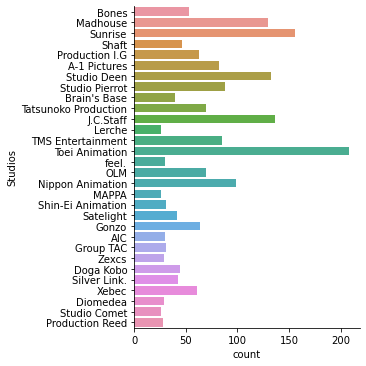

In [3]:
sb.catplot(y = 'Studios', data = TV_data[TV_data.groupby('Studios').Studios.transform('count') > 25], kind='count')

In [4]:
TV_Studios_array=TV_data["Studios"].unique()
np.where(TV_Studios_array == TV_data["Studios"].iloc[27])[0][0]

11

In [5]:
TV_data["Genres"].iloc[0]

'Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen'

# 08/03 
## Convert source to int and compress them together
## Extracted genre top 2
## Converted genre from str to int, added genre_reference_1 and genre_reference_2
## Converted Aired to Season (1= Winter)
## Ran LinReg on 5 predictors, obtained R^2 = 0.39

### To-do
### Clean studio (some NULL)
### Modify dectree

In [6]:
source = TV_data['Source']
genres = TV_data['Genres']
score = TV_data['Score']
members = pd.DataFrame(TV_data['Members'])
fav = TV_data['Favorites']
studios = TV_data['Studios']

In [7]:
TV_data.insert(loc=11, column='Fav%', value=round(TV_data['Favorites']*100/TV_data['Members'], 3))

In [8]:
source.unique()

array(['Manga', 'Visual novel', 'Light novel', 'Original', 'Web manga',
       'Novel', '4-koma manga', 'Card game', 'Book', 'Game', 'Other',
       'Unknown', 'Music', 'Picture book', 'Digital manga', 'Radio'],
      dtype=object)

Convert source to an int, total of 16 sources. Compress some sources together

0 - All manga + Picture book

1 - Novel, Light Novel, Book

2 - All game + Visual novel

3 - Other + Unknown

4 - Music + Radio

5 - Original

In [9]:
source_list = source.tolist() #list of sources based on index in Tv_data
source_list_unique = ["Manga", "Novel", "Game", "Other", "Audio", "Original"] #compresed source_reference list

In [10]:
a = [0] * len(TV_data)
for i in range(len(source_list)):
    if source_list[i] in ["Manga", "Web manga", "4-koma manga", "Digital manga", "Picture book"]:
        a[i] = source_list_unique.index("Manga")
    elif source_list[i] in ["Visual novel", "Light novel", "Book"]:
        a[i] = source_list_unique.index("Novel")
    elif source_list[i] in ["Card game", "Game", "Visual novel"]:
        a[i] = source_list_unique.index("Game")
    elif source_list[i] in ["Other", "Unknown"]:
        a[i] = source_list_unique.index("Other")
    elif source_list[i] in ["Radio", "Music"]:
        a[i] = source_list_unique.index("Audio")
    elif source_list[i] == "Original":
        a[i] = source_list_unique.index("Original")
TV_data["Source_reference"] = a

<ipython-input-10-1c5062921d02>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Source_reference"] = a


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 

def decTree(y, x, depth):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 48))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=["0","1","2","3","4","5"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5919899874843555

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.555



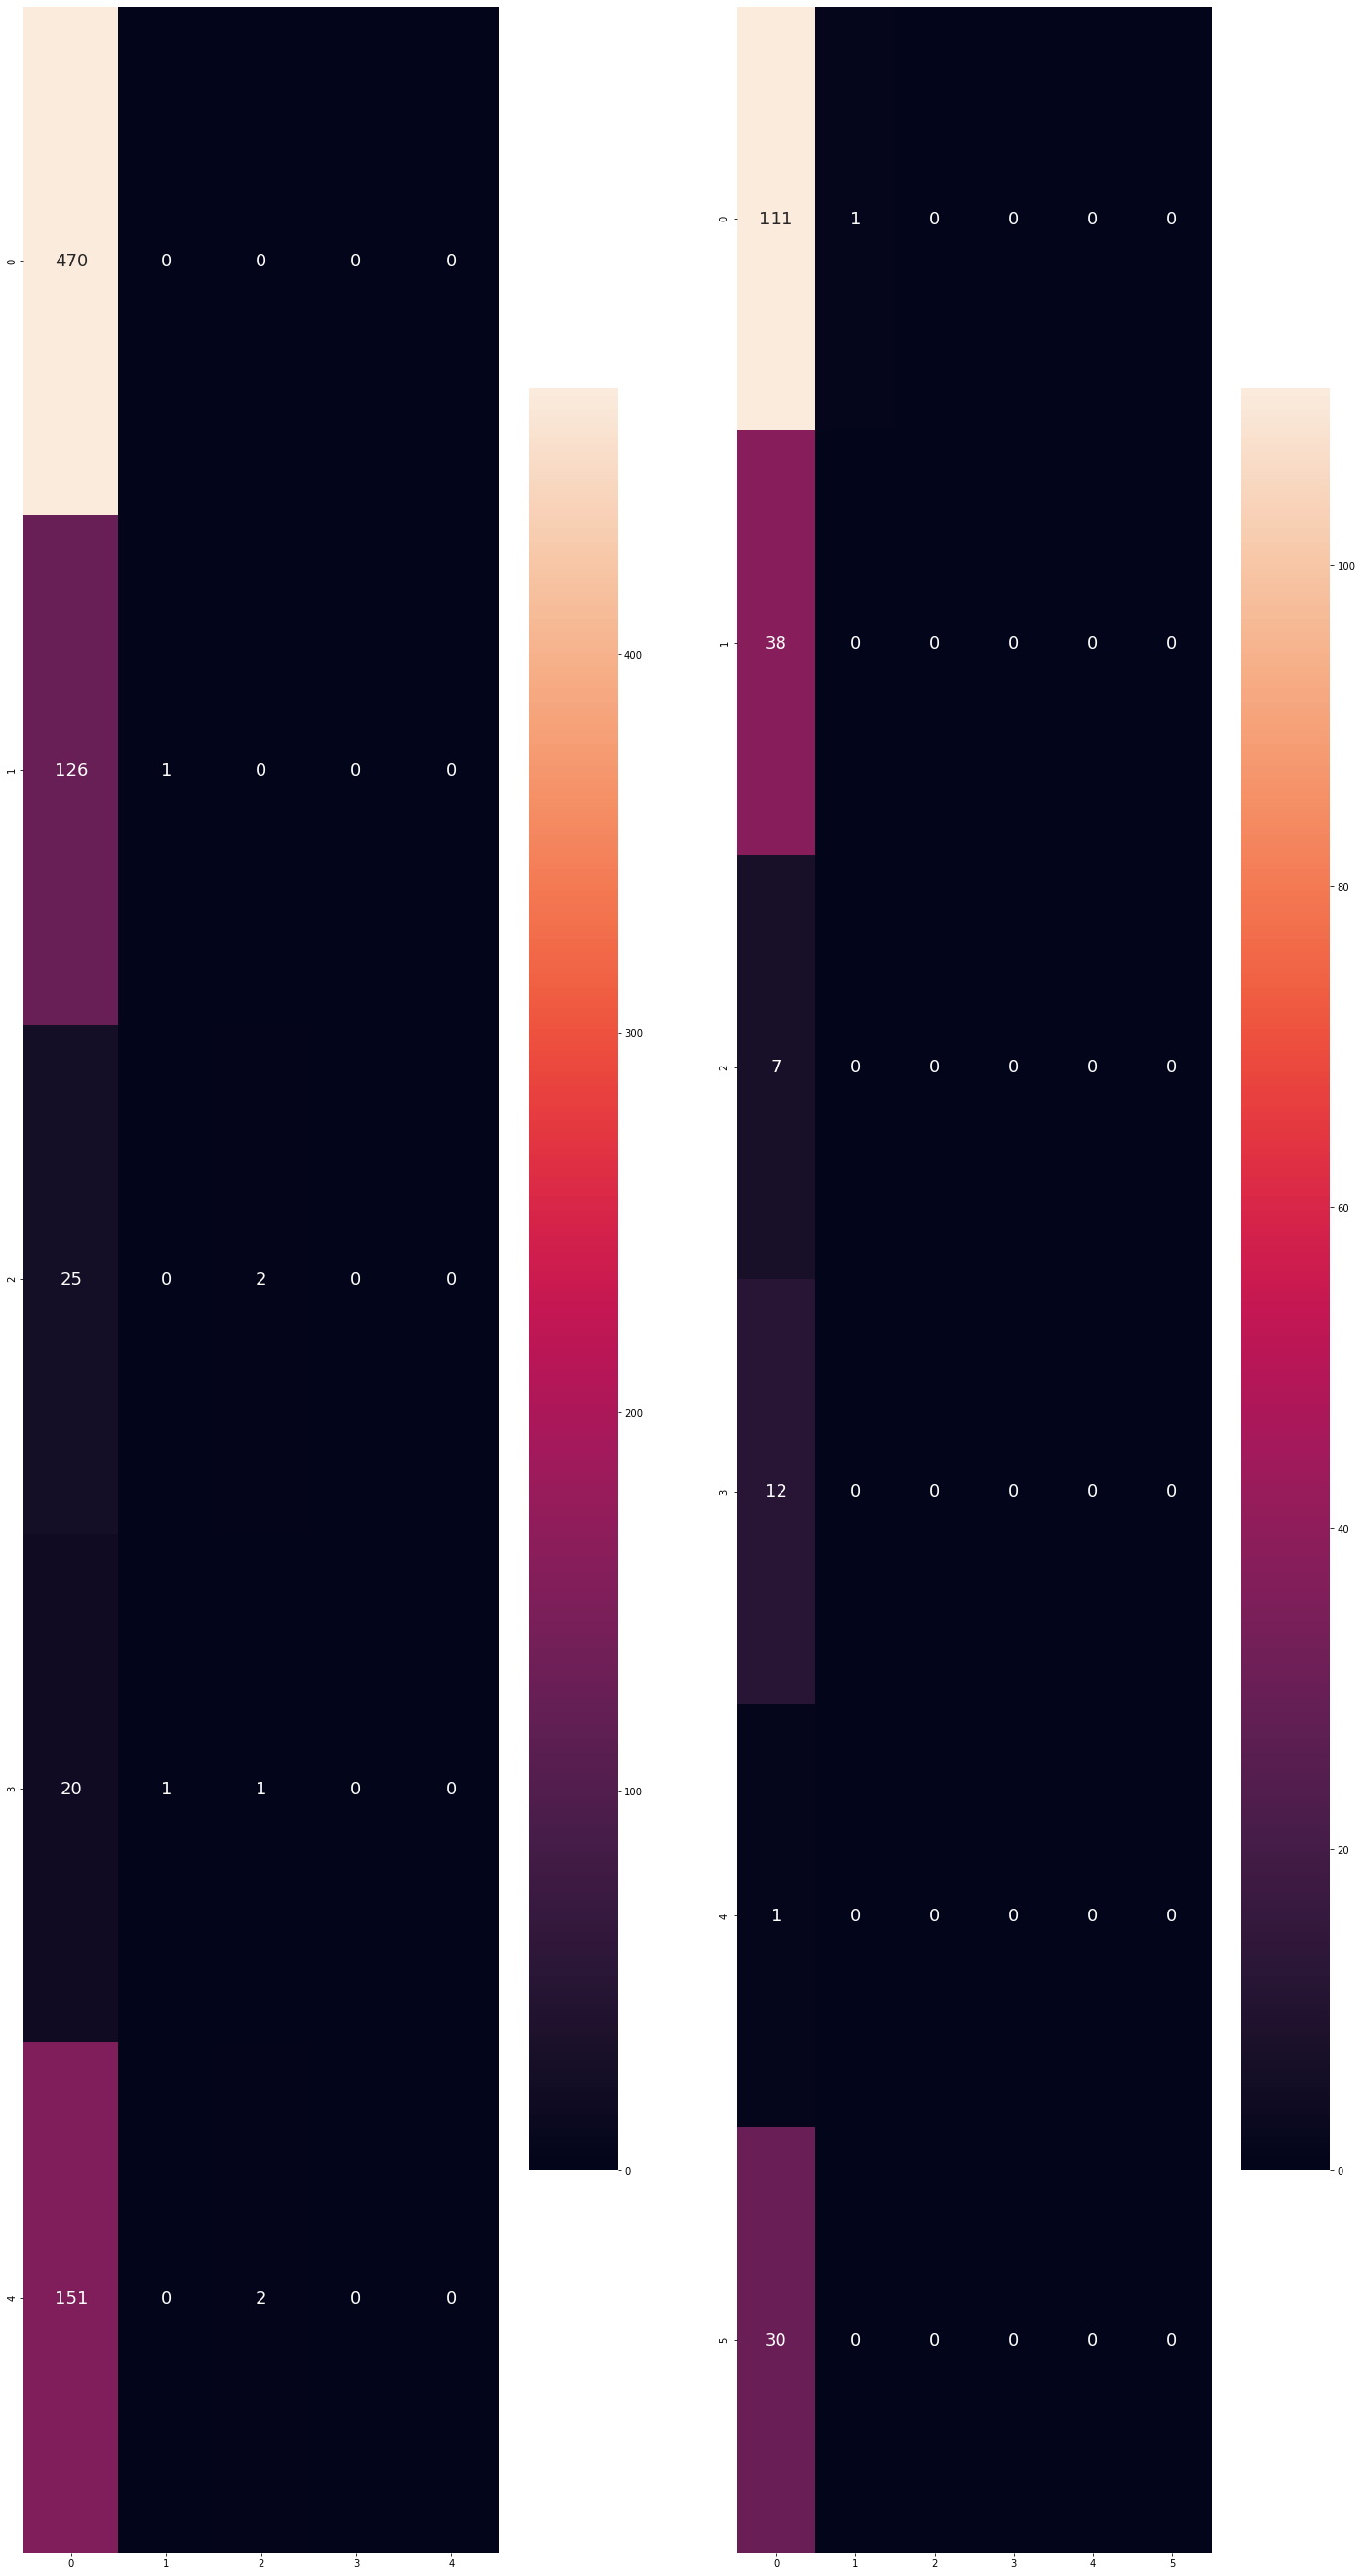

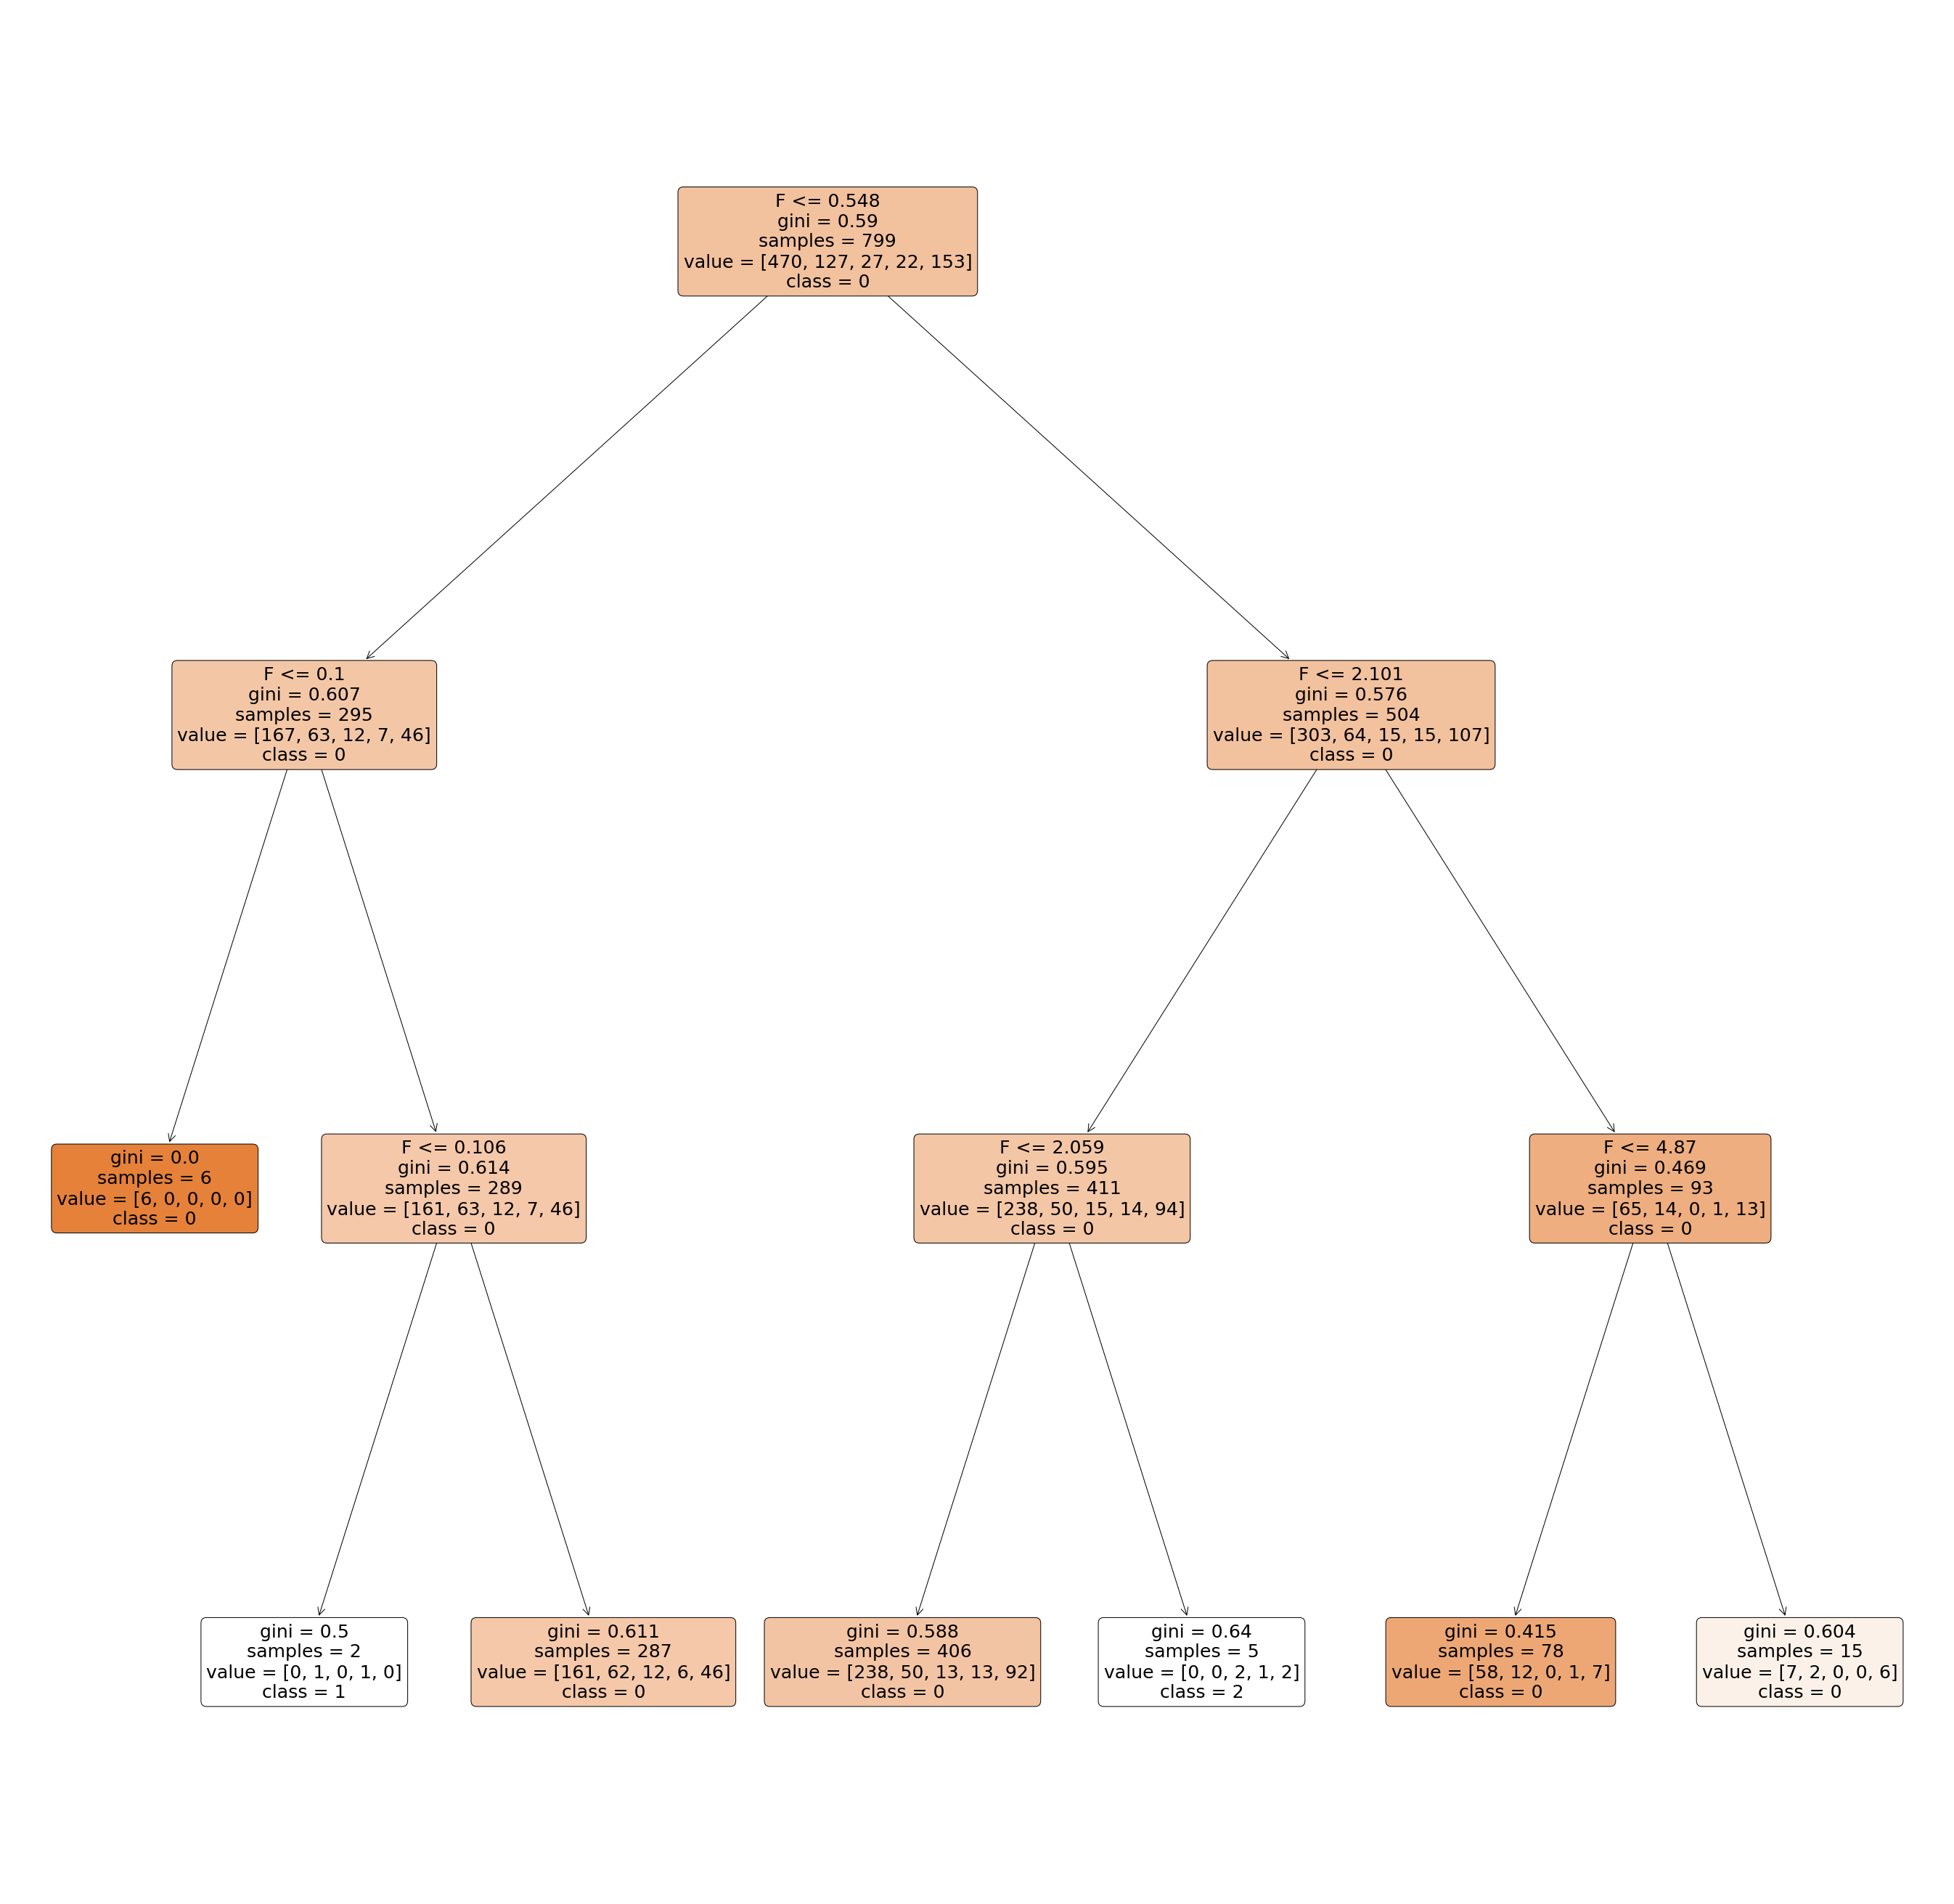

In [12]:
decTree(TV_data["Source_reference"].iloc[:999].to_numpy().reshape(-1,1),TV_data["Fav%"].iloc[:999].to_numpy().reshape(-1,1),3)

In [13]:
genres_list_unique = [0] * 100
index = 0;
for i in range(len(genres)):
    temp_list = genres.iloc[i].split(",")
    for element in temp_list:
        if(element.strip() not in genres_list_unique):
            genres_list_unique[index] = element.strip()
            index += 1
genres_list_unique = [i for i in genres_list_unique if i != 0] 
genres_list_unique.insert(0, "Null") #genres_list_unique contains all possible genre, first index is NULL(no genre)

In [14]:
a = [0] * len(TV_data)
b = [0] * len(TV_data)
for i in range(len(TV_data)):
    word = TV_data["Genres"].iloc[i].split(",")
    a[i] = genres_list_unique.index(word[0].strip())
    if(len(word)>1):
        b[i] = genres_list_unique.index(word[1].strip())

In [15]:
TV_data["genre_reference_1"] = a
TV_data["genre_reference_2"] = b
TV_data

<ipython-input-15-8bc38560b612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["genre_reference_1"] = a
<ipython-input-15-8bc38560b612>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["genre_reference_2"] = b


,Anime Title,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Source_reference,genre_reference_1,genre_reference_2
0,Fullmetal Alchemist: Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",9.22,2025613,167812,8.285,0,1,2
1,Steins;Gate,TV,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,Visual novel,"Thriller, Sci-Fi",9.12,1636151,139909,8.551,1,9,10
2,Gintama°,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,0,1,4
3,Hunter x Hunter (2011),TV,148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",9.11,1459320,130492,8.942,0,1,3
5,Gintama',TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,Barom One,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,0,1,10
9983,Kurayami Santa,TV,13,"Jul 5, 2015 to Sep 27, 2015",NaN,ILCA,Original,"Historical, Supernatural",5.25,2392,6,0.251,5,11,19
9985,Omae wa Mada Gunma wo Shiranai,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,0,4,24
9987,Peeping Life,TV,10,"May 14, 2009 to Aug 11, 2009",CoMix Wave Films,NaN,Original,"Slice of Life, Comedy",5.25,2481,3,0.121,5,18,4


In [16]:
c = [0] * len(TV_data)
for i  in range(len(TV_data)):
    temp = TV_data["Aired"].iloc[i][:3]
    if temp == 'Jan' or temp == 'Feb' or temp == 'Mar': #Winter
        c[i] = 1
    elif temp == 'Apr' or temp == 'May' or temp == 'Jun': #Spring
        c[i] = 2
    elif temp == 'Jul' or temp == 'Aug' or temp == 'Sep': # Summer
        c[i] = 3
    else:                                                #Autumn/Fall(americans)
        c[i] = 4
TV_data["Season"] = c
TV_data

<ipython-input-16-f503446a6c22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Season"] = c


,Anime Title,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Source_reference,genre_reference_1,genre_reference_2,Season
0,Fullmetal Alchemist: Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",9.22,2025613,167812,8.285,0,1,2,2
1,Steins;Gate,TV,24,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,Visual novel,"Thriller, Sci-Fi",9.12,1636151,139909,8.551,1,9,10,2
2,Gintama°,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,0,1,4,2
3,Hunter x Hunter (2011),TV,148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",9.11,1459320,130492,8.942,0,1,3,4
5,Gintama',TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,0,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,Barom One,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,0,1,10,4
9983,Kurayami Santa,TV,13,"Jul 5, 2015 to Sep 27, 2015",NaN,ILCA,Original,"Historical, Supernatural",5.25,2392,6,0.251,5,11,19,3
9985,Omae wa Mada Gunma wo Shiranai,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,0,4,24,2
9987,Peeping Life,TV,10,"May 14, 2009 to Aug 11, 2009",CoMix Wave Films,NaN,Original,"Slice of Life, Comedy",5.25,2481,3,0.121,5,18,4,2


In [17]:
studio_reference_unique = [0] * 335
index = 0
for i in range(len(TV_data)):
    temp = studios.iloc[i]
    if(isinstance(temp,str)):
        temp = temp.split(",")
        for j in range(len(temp)):
            if(temp[j].strip() not in studio_reference_unique):
                studio_reference_unique[index] = temp[j].strip()
                index += 1
    else:
        pass
studio_reference_unique

['Bones',
 'White Fox',
 'Bandai Namco Pictures',
 'Madhouse',
 'Sunrise',
 'Wit Studio',
 'Shaft',
 'Kyoto Animation',
 'Production I.G',
 'A-1 Pictures',
 'Studio Deen',
 'Artland',
 'Kinema Citrus',
 'Studio Pierrot',
 "Brain's Base",
 'Tokyo Movie Shinsha',
 'ufotable',
 'Gainax',
 'Shuka',
 'CloverWorks',
 'David Production',
 'Tatsunoko Production',
 'MAPPA',
 'J.C.Staff',
 'Lerche',
 'TMS Entertainment',
 'Hal Film Maker',
 'Toei Animation',
 'Egg Firm',
 'feel.',
 'Manglobe',
 'OLM',
 'SynergySP',
 'Platinum Vision',
 'Orange',
 'Nippon Animation',
 'Studio Signpost',
 'Zero-G',
 'Studio Gokumi',
 'Nakamura Production',
 'Studio 3Hz',
 'Animation Do',
 'Daume',
 'Telecom Animation Film',
 'Shin-Ei Animation',
 'Actas',
 'Ezόla',
 'LIDENFILMS',
 'Hoods Entertainment',
 'Satelight',
 'Gonzo',
 'Palm Studio',
 'AIC',
 '8bit',
 'Nomad',
 'Fanworks',
 'Imagineer',
 'Group TAC',
 'GoHands',
 'Seven Arcs',
 'Zexcs',
 'AIC Spirits',
 'Asread',
 'Doga Kobo',
 'Xebec',
 'I.Gzwei',
 'Fuji

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X1 = TV_data["genre_reference_1"].iloc[:3000].to_numpy().reshape(-1,1) #0.20 without
X2 = TV_data["genre_reference_2"].iloc[:3000].to_numpy().reshape(-1,1) #0.18 without
X3 = TV_data["Season"].iloc[:3000].to_numpy().reshape(-1,1) #0.25 without
X4 = TV_data["Source_reference"].iloc[:3000].to_numpy().reshape(-1,1) ##0.12 without
X5 = TV_data['Members'].iloc[:3000].to_numpy().reshape(-1,1) #0.32 without (deg9)
X6 = TV_data['Episodes'].iloc[:3000].to_numpy().reshape(-1,1) #0.39 without, aka useless
X = np.concatenate((X1, X2, X3, X4, X5), axis=1) #0.39 with X1-5 deg2
y = TV_data["Score"].iloc[:3000]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

r_sq = model.score(X_poly, y)
print('R^2 score:', r_sq)

R^2 score: 0.3979135348194981


From this point onwards, we are trying to use manga data to predict the score

In [19]:
import difflib
str1 = "help season 2"
str2 = "help"
difflib.SequenceMatcher(None, str1, str2).ratio()

0.47058823529411764

In [20]:
manga_raw = pd.read_csv(r"C:\Users\user\Desktop\archive\manga.csv")
manga_raw

,id,title,title_en,image_url,chapters,publishing,published_from,published_to,score,scored_by,members,favorites,author
0,1,Monster,Monster,https://cdn.myanimelist.net/images/manga/3/258...,162,False,1994-12-05T00:00:00+00:00,2001-12-20T00:00:00+00:00,9.14,83708,214367,18710,1867.0
1,2,Berserk,Berserk,https://cdn.myanimelist.net/images/manga/1/157...,0,True,1989-08-25T00:00:00+00:00,NaN,9.47,299323,607170,113562,1868.0
2,3,20th Century Boys,20th Century Boys,https://cdn.myanimelist.net/images/manga/5/260...,249,False,1999-09-27T00:00:00+00:00,2006-04-24T00:00:00+00:00,8.95,75431,219385,17375,1867.0
3,4,Yokohama Kaidashi Kikou,Yokohama Kaidashi Kikou,https://cdn.myanimelist.net/images/manga/1/171...,142,False,1994-04-25T00:00:00+00:00,2006-02-25T00:00:00+00:00,8.68,16946,67265,4769,1869.0
4,7,Hajime no Ippo,NaN,https://cdn.myanimelist.net/images/manga/2/250...,0,True,1989-09-27T00:00:00+00:00,NaN,8.70,32838,76329,6087,1876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62789,156479,Lolita Meshi,NaN,https://cdn.myanimelist.net/images/manga/3/277...,33,False,2020-03-13T00:00:00+00:00,2021-04-30T00:00:00+00:00,0.00,0,10,0,64518.0
62790,156482,After School,NaN,https://cdn.myanimelist.net/images/manga/2/277...,1,False,2021-09-22T00:00:00+00:00,NaN,0.00,0,6,0,64389.0
62791,156486,Nagisa no Saameido,NaN,https://cdn.myanimelist.net/images/manga/1/277...,0,True,2023-01-27T00:00:00+00:00,NaN,0.00,0,28,0,50056.0
62792,156498,Susumamire no Kishi,Knight Covered in Soot,https://cdn.myanimelist.net/images/manga/2/277...,0,True,2022-05-27T00:00:00+00:00,NaN,0.00,0,7,0,64514.0


In [26]:
TV_data_manga = pd.read_csv(r"C:\Users\user\Desktop\TV_data_manga.csv")
TV_data_manga=TV_data_manga.drop("Unnamed: 0", axis=1)
TV_data_manga

,Anime Title,Score_reference,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Source_reference,genre_reference_1,genre_reference_2,Season,Manga_score
0,Fullmetal Alchemist: Brotherhood,High,TV,64,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",9.22,2025613,167812,8.285,0,1,2,2,9.04
1,Gintama°,High,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,0,1,4,2,8.62
2,Hunter x Hunter (2011),High,TV,148,"Oct 2, 2011 to Sep 24, 2014","VAP, Nippon Television Network, Shueisha",Madhouse,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",9.11,1459320,130492,8.942,0,1,3,4,8.72
3,Gintama',High,TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,0,1,10,2,8.62
4,Shingeki no Kyojin Season 3 Part 2,High,TV,10,"Apr 29, 2019 to Jul 1, 2019","Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,"Action, Military, Mystery, Super Power, Drama,...",9.07,815370,28479,3.493,0,1,2,2,6.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Makeruna!! Aku no Gundan!,Medium,TV,12,"Apr 5, 2017 to Jun 21, 2017",Bushiroad,Tatsunoko Production,Manga,"Comedy, Shounen",5.33,1628,0,0.000,0,4,8,2,6.60
1518,Nobunaga-sensei no Osanazuma,Medium,TV,12,"Apr 6, 2019 to Jun 22, 2019",NaN,Seven,Manga,"Comedy, Ecchi, Harem, Romance, School",5.29,52359,78,0.149,0,4,35,2,7.71
1519,Barom One,Medium,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,0,1,10,4,8.30
1520,Omae wa Mada Gunma wo Shiranai,Medium,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,0,4,24,2,7.05


In [27]:
TV_data_1k = TV_data_manga
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X1 = TV_data_1k["genre_reference_1"].to_numpy().reshape(-1,1)
X2 = TV_data_1k["genre_reference_2"].to_numpy().reshape(-1,1)
X3 = TV_data_1k["Season"].to_numpy().reshape(-1,1) 
X4 = TV_data_1k["Source_reference"].to_numpy().reshape(-1,1) 
X5 = TV_data_1k['Fav%'].to_numpy().reshape(-1,1) 
X6 = TV_data_1k['Episodes'].to_numpy().reshape(-1,1) #0.39 without, aka useless
X7 = TV_data_1k['Manga_score'].to_numpy().reshape(-1,1)
X = np.concatenate((X1, X2, X3, X5, X7), axis=1) 
Y = TV_data_1k["Score"]

max_rsq = 0
best_deg = 0
for i in range(2,10):
    poly = PolynomialFeatures(degree=i)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    X_poly = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_poly, Y_train)
    r_sq = model.score(X_poly, Y_train)
    r_sq2 = model.score(X_poly_test, Y_test)
    if r_sq2 <0:
        break
    if r_sq2 > max_rsq:
        max_rsq = r_sq2
        best_deg = i
    print('Train R^2 score:', r_sq, i)
    print('Test R^2 score:', r_sq2)

print('Best R^2 score:', max_rsq, best_deg)

Train R^2 score: 0.49278936366177994 2
Test R^2 score: 0.45351654348332504
Train R^2 score: 0.19876861196255313 3
Test R^2 score: 0.13275576312197113
Train R^2 score: 0.5993024702552723 4
Test R^2 score: 0.4732086113794316
Best R^2 score: 0.4732086113794316 4


In [28]:
revenue = pd.read_csv(r"C:\Users\user\Downloads\someanithing.com (updated through sales week of 2023-01-23) - 2000-Now.csv")
revenue

,Series Title,Type,Season,Year,"Sales Avg, Initial Release","Sales Avg, Re-releases","Sales Avg, Total",Revenue\n(Initial Release),Source Material,Animation Studio,Publisher,Distributor,万円
0,.hack//SIGN,TV,Spring,2002,"6,032",0,"6,032","¥362,220,000",game,Bee Train,Bandai Visual,Bandai Visual,"¥36,222"
1,.hack//Tasogare no Udewa Densetsu,TV,Winter,2003,"2,954",0,"2,954","¥102,810,000",game,Bee Train,Bandai Visual,Bandai Visual,"¥10,281"
2,.hack//Roots,TV,Spring,2006,"2,138",0,"2,138","¥113,000,000",game,Bee Train,Bandai Visual,Bandai Visual,"¥11,300"
3,009-1,TV,Fall,2006,"1,258",0,"1,258","¥46,390,000",manga,Ishimori Entertainment,Aniplex,Sony,"¥4,639"
4,07-Ghost,TV,Spring,2009,"2,529",0,"2,529","¥197,230,000",manga,Studio Deen,Avex,Avex,"¥19,723"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,Zettai Shounen,TV,Spring,2005,644,0,644,"¥11,590,000",original,Asia-Do,Bandai Visual,Bandai Visual,"¥1,159"
2558,Zipang,TV,Fall,2004,"1,639",0,"1,639","¥100,310,000",manga,Studio Deen,Marvelous AQL,Pony Canyon,"¥10,031"
2559,Zombie-Loan,TV,Summer,2007,543,0,543,"¥17,930,000",manga,Xebec,E-Net Frontier,E-Net Frontier,"¥1,793"
2560,Zombieland Saga,TV,Fall,2018,"20,917","1,227","22,144","¥878,500,000",original,MAPPA,Avex,Avex,"¥87,850"


In [73]:
import math
a = [0] * len(TV_data_manga) 
for i in range(len(TV_data_manga)): 
    anime_title = TV_data_manga["Anime Title"].iloc[i] 
    for j in range(len(revenue)): 
        revenue_title = revenue["Series Title"].iloc[j] 
        if(difflib.SequenceMatcher(None, anime_title,revenue_title).ratio() > 0.5): 
            money = revenue["Revenue\n(Initial Release)"].iloc[j] 
            money = money[1:].replace(",","")
            a[i] = math.pow(int(money),1/3)
            break 
    print("%d. %d"%(i, a[i]))

0. 326
1. 326
2. 346
3. 941
4. 482
5. 326
6. 326
7. 648
8. 427
9. 613
10. 413
11. 482
12. 402
13. 297
14. 363
15. 83
16. 504
17. 839
18. 389
19. 297
20. 522
21. 116
22. 482
23. 689
24. 481
25. 1076
26. 219
27. 312
28. 440
29. 236
30. 427
31. 297
32. 522
33. 413
34. 447
35. 689
36. 413
37. 413
38. 219
39. 488
40. 1079
41. 413
42. 297
43. 634
44. 941
45. 1076
46. 495
47. 413
48. 285
49. 376
50. 403
51. 216
52. 1076
53. 451
54. 247
55. 420
56. 1079
57. 536
58. 482
59. 488
60. 340
61. 203
62. 1106
63. 413
64. 1505
65. 561
66. 613
67. 528
68. 413
69. 413
70. 788
71. 413
72. 413
73. 523
74. 206
75. 546
76. 219
77. 795
78. 81
79. 159
80. 297
81. 784
82. 297
83. 77
84. 356
85. 378
86. 582
87. 442
88. 799
89. 124
90. 116
91. 316
92. 548
93. 397
94. 297
95. 413
96. 314
97. 620
98. 116
99. 624
100. 413
101. 298
102. 469
103. 476
104. 1289
105. 277
106. 577
107. 643
108. 396
109. 739
110. 229
111. 124
112. 143
113. 450
114. 495
115. 290
116. 390
117. 314
118. 303
119. 363
120. 340
121. 671
122. 11

925. 595
926. 86
927. 442
928. 155
929. 788
930. 524
931. 252
932. 160
933. 368
934. 363
935. 493
936. 363
937. 167
938. 414
939. 389
940. 653
941. 469
942. 412
943. 175
944. 213
945. 340
946. 1338
947. 407
948. 171
949. 546
950. 377
951. 255
952. 203
953. 1662
954. 280
955. 716
956. 808
957. 116
958. 446
959. 839
960. 232
961. 164
962. 338
963. 251
964. 407
965. 1505
966. 135
967. 394
968. 83
969. 344
970. 211
971. 291
972. 95
973. 144
974. 547
975. 116
976. 377
977. 390
978. 561
979. 238
980. 442
981. 579
982. 482
983. 546
984. 607
985. 320
986. 140
987. 346
988. 562
989. 561
990. 103
991. 427
992. 245
993. 390
994. 552
995. 270
996. 772
997. 482
998. 144
999. 277
1000. 177
1001. 155
1002. 323
1003. 314
1004. 390
1005. 240
1006. 591
1007. 579
1008. 162
1009. 546
1010. 556
1011. 84
1012. 120
1013. 567
1014. 629
1015. 223
1016. 269
1017. 412
1018. 292
1019. 423
1020. 651
1021. 450
1022. 354
1023. 638
1024. 203
1025. 290
1026. 349
1027. 83
1028. 140
1029. 482
1030. 193
1031. 558
1032. 7

In [74]:
TV_data_manga["revenue"]=a
TV_data_manga=TV_data_manga.loc[TV_data_manga["revenue"]>0]
TV_data_manga

,Anime Title,Score_reference,Score_reference2,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Source_reference,genre_reference_1,genre_reference_2,Season,Manga_score,revenue
1,Gintama°,High,High,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,0,1,4,2,8.62,326.826013
3,Gintama',High,High,TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,0,1,10,2,8.62,326.826013
4,Shingeki no Kyojin Season 3 Part 2,High,High,TV,10,"Apr 29, 2019 to Jul 1, 2019","Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,"Action, Military, Mystery, Super Power, Drama,...",9.07,815370,28479,3.493,0,1,2,2,6.78,346.440105
5,Gintama': Enchousen,High,High,TV,13,"Oct 4, 2012 to Mar 28, 2013","TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus",Sunrise,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.04,204816,2302,1.124,0,1,4,4,8.62,941.651691
6,3-gatsu no Lion 2nd Season,High,High,TV,22,"Oct 14, 2017 to Mar 31, 2018","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace, T...",Shaft,Manga,"Drama, Game, Seinen, Slice of Life",9.02,238010,9854,4.140,0,5,16,4,6.97,482.343860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Makeruna!! Aku no Gundan!,Low,Low,TV,12,"Apr 5, 2017 to Jun 21, 2017",Bushiroad,Tatsunoko Production,Manga,"Comedy, Shounen",5.33,1628,0,0.000,0,4,8,2,6.60,138.556598
1518,Nobunaga-sensei no Osanazuma,Low,Low,TV,12,"Apr 6, 2019 to Jun 22, 2019",NaN,Seven,Manga,"Comedy, Ecchi, Harem, Romance, School",5.29,52359,78,0.149,0,4,35,2,7.71,495.139572
1519,Barom One,Low,Low,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,0,1,10,4,8.30,331.380807
1520,Omae wa Mada Gunma wo Shiranai,Low,Low,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,0,4,24,2,7.05,115.229535


In [31]:
TV_data_1k = TV_data_manga
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X1 = TV_data_1k["genre_reference_1"].to_numpy().reshape(-1,1)
X2 = TV_data_1k["genre_reference_2"].to_numpy().reshape(-1,1)
X3 = TV_data_1k["Season"].to_numpy().reshape(-1,1) 
X4 = TV_data_1k["Source_reference"].to_numpy().reshape(-1,1) 
X5 = TV_data_1k['Fav%'].to_numpy().reshape(-1,1) 
X6 = TV_data_1k['Episodes'].to_numpy().reshape(-1,1) #0.39 without, aka useless
X7 = TV_data_1k['Manga_score'].to_numpy().reshape(-1,1)
X8 = (TV_data_1k['revenue']).to_numpy().reshape(-1,1)
X = np.concatenate((X1, X2, X3, X5, X7, X8), axis=1) 
Y = TV_data_1k["Score"]

max_rsq = 0
best_deg = 0
for i in range(2,10):
    poly = PolynomialFeatures(degree=i)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    X_poly = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_poly, Y_train)
    r_sq = model.score(X_poly, Y_train)
    r_sq2 = model.score(X_poly_test, Y_test)
    if r_sq2 <0:
        break
    if r_sq2 > max_rsq:
        max_rsq = r_sq2
        best_deg = i
    print('Train R^2 score:', r_sq, i)
    print('Test R^2 score:', r_sq2)

print('Best R^2 score:', max_rsq, best_deg)

Train R^2 score: 0.5176177176867628 2
Test R^2 score: 0.47718530682591653
Best R^2 score: 0.47718530682591653 2


<AxesSubplot:xlabel='revenue', ylabel='Score'>

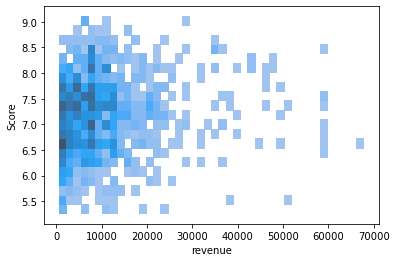

In [32]:
sb.histplot(data=TV_data_manga, x="revenue", y="Score", kde=True)

In [46]:
TV_data_manga.insert(loc = 1, column = "Score_reference", value = "Medium")

In [47]:
for i in range(len(TV_data_manga)):
    if TV_data_manga["Score"].iloc[i] >8.5:
        TV_data_manga["Score_reference"].iloc[i] = "High"
    if TV_data_manga["Score"].iloc[i] <6.5:
        TV_data_manga["Score_reference"].iloc[i] = "Low" 

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<ipython-input-11-8b9e60ab67fd>:14: RuntimeWarning: invalid value encountered in longlong_scalars
  FP = cm[0][1]/(cm[0][1] + cm[0][0])
<ipython-input-11-8b9e60ab67fd>:16: RuntimeWarning: invalid value encountered in longlong_scalars
  TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
<ipython-input-11-8b9e60ab67fd>:17: RuntimeWarning: invalid value encountered in longlong_scalars
  FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7929342492639843

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.807843137254902



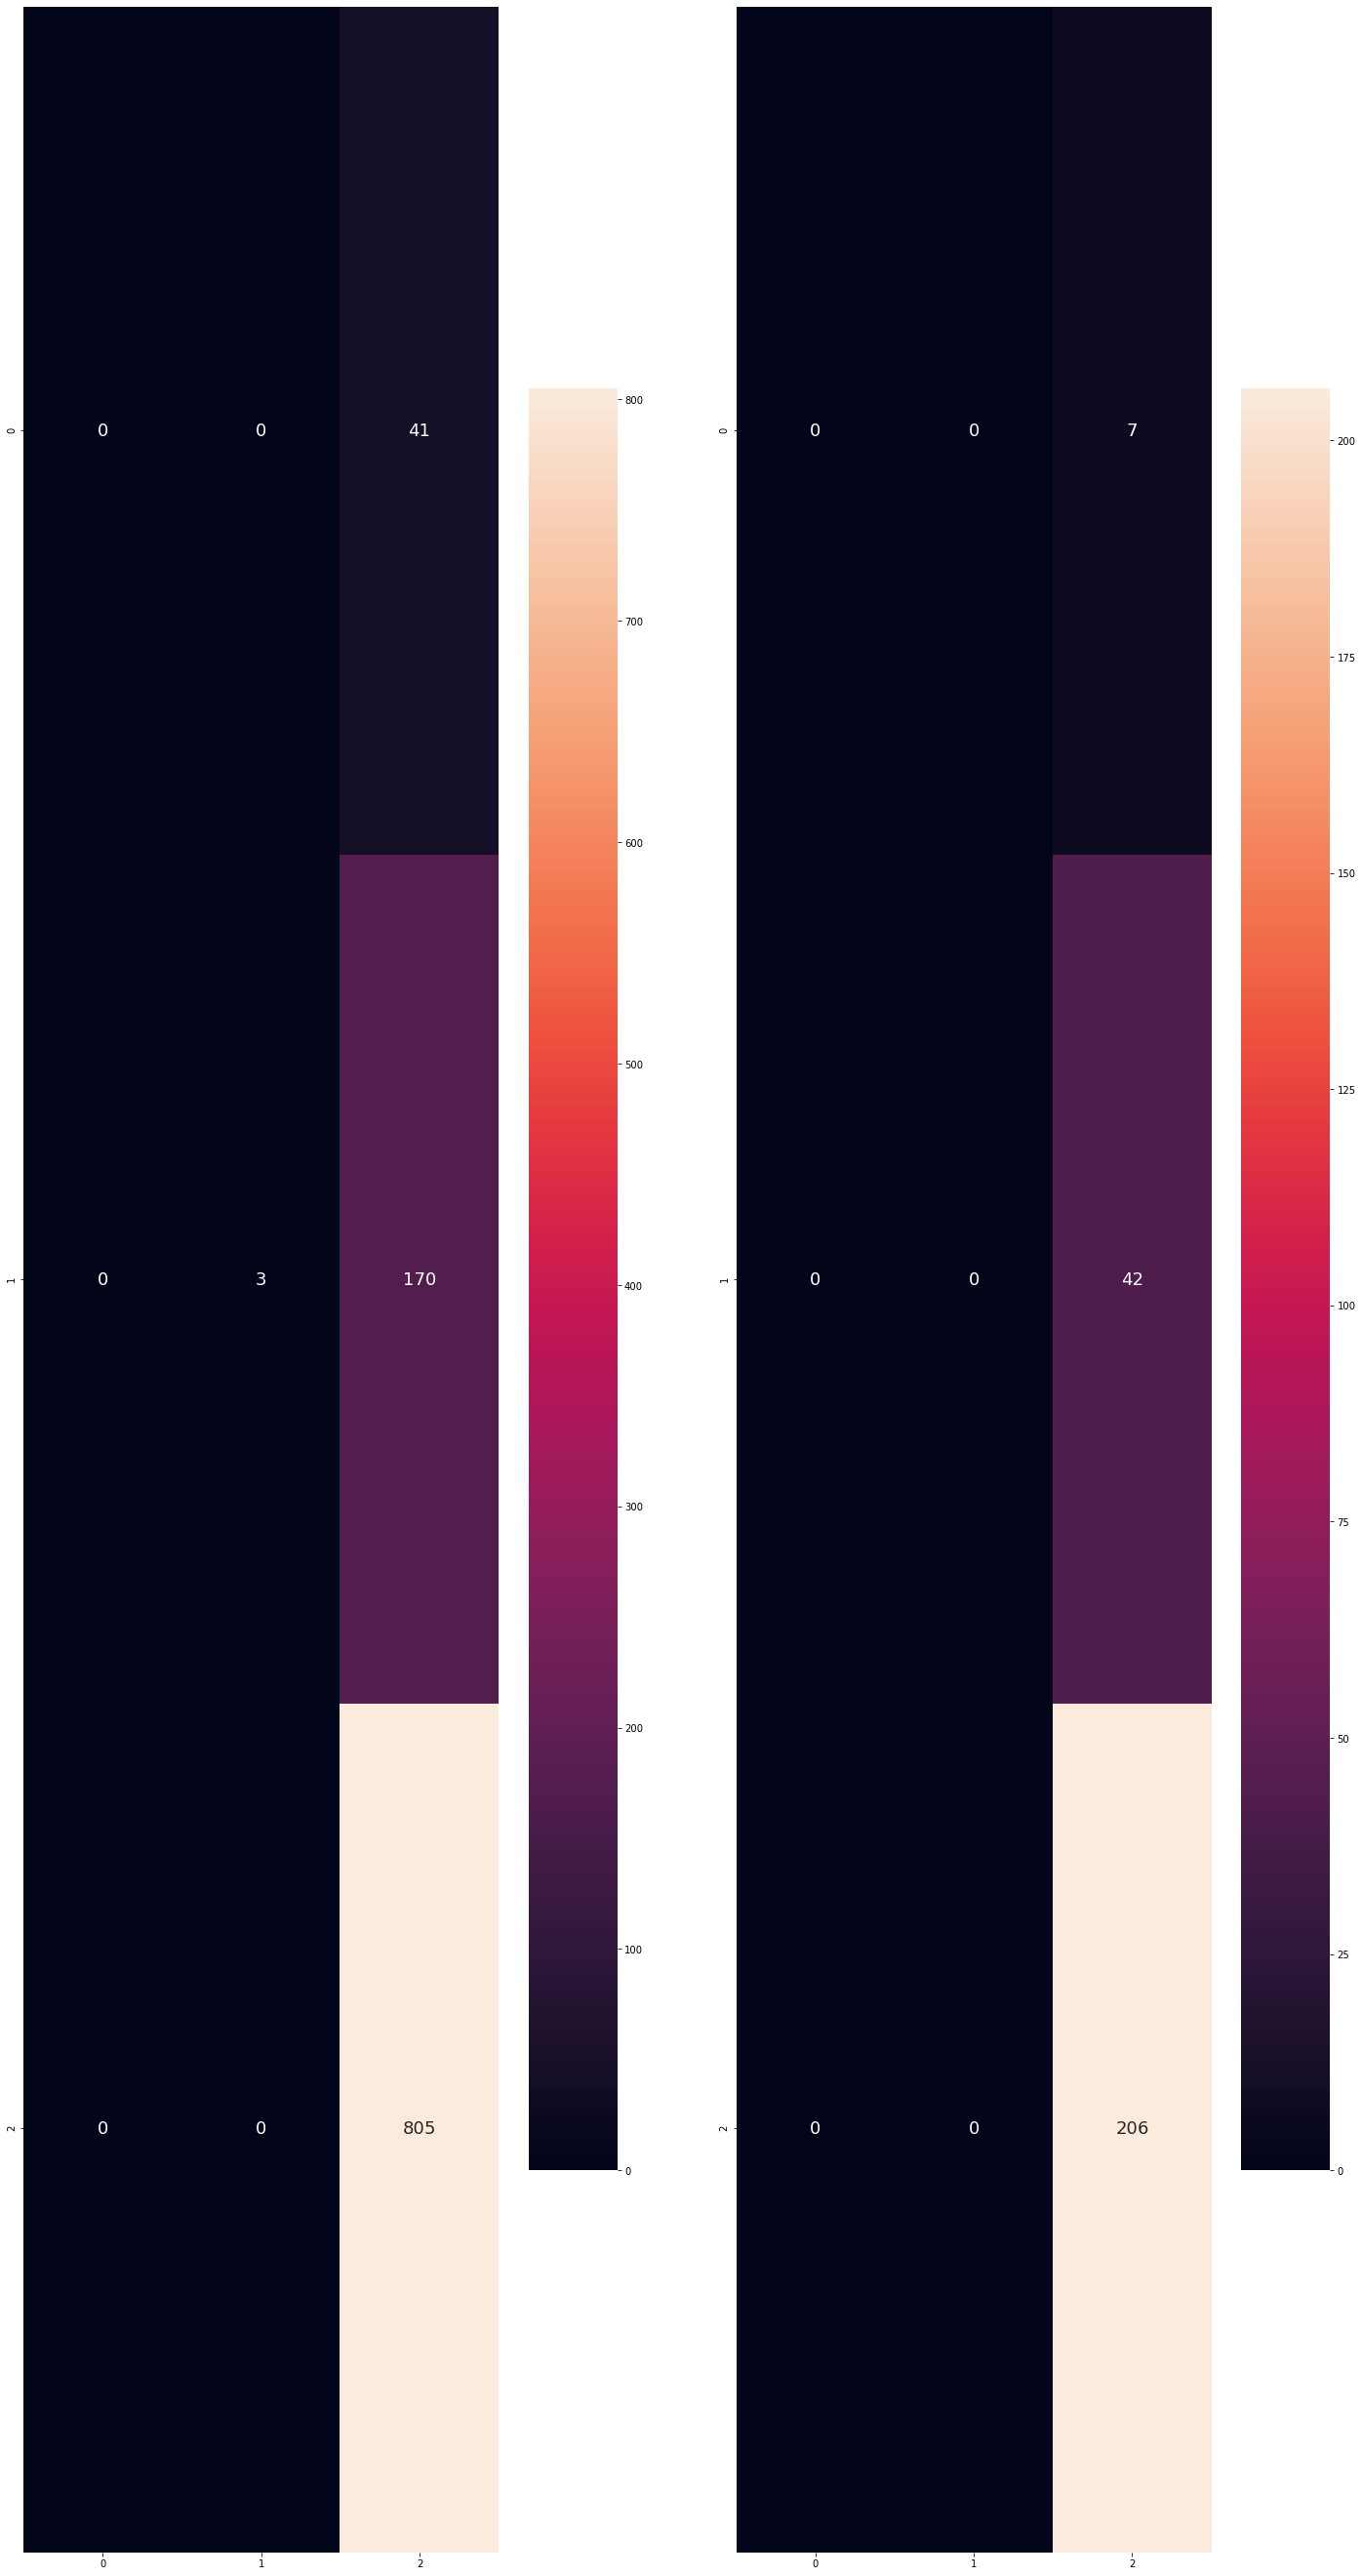

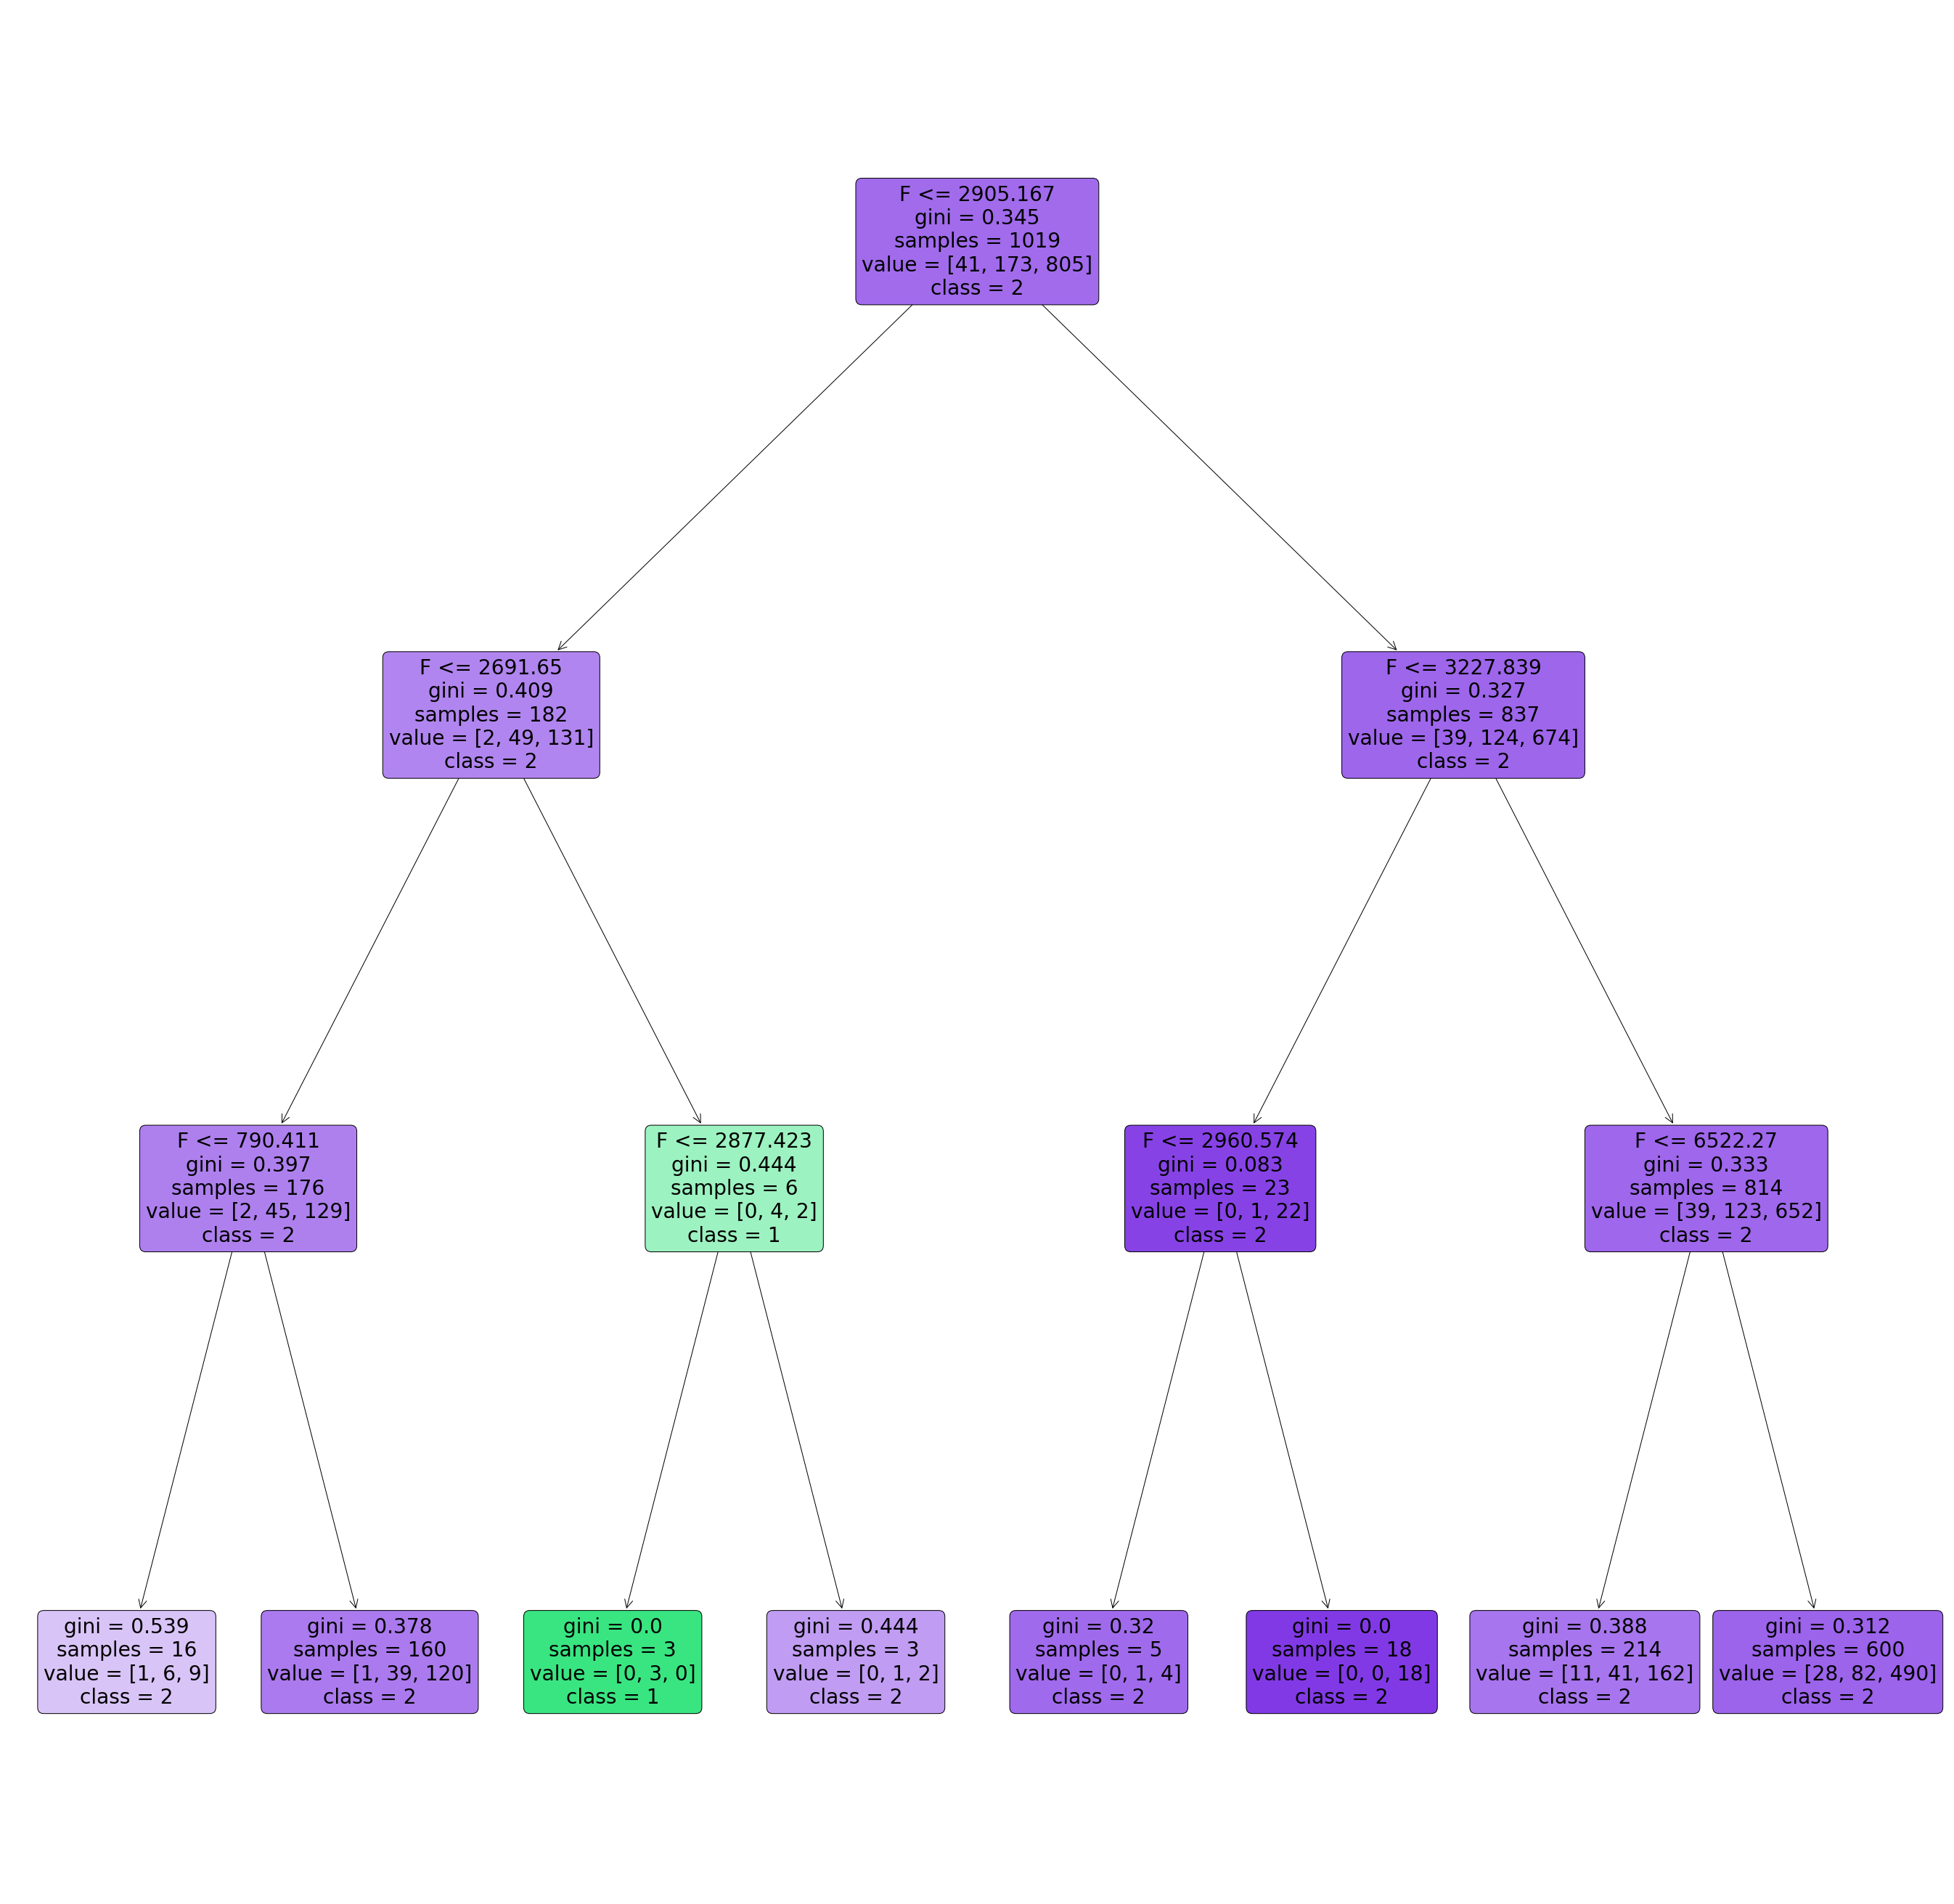

In [48]:
decTree(TV_data_manga["Score_reference"].to_numpy().reshape(-1,1),TV_data_manga["revenue"].to_numpy().reshape(-1,1),3)

Same thing but with 5 factors
High/medium high/medium low/low


In [68]:
TV_data_manga

,Anime Title,Score_reference,Score_reference2,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Source_reference,genre_reference_1,genre_reference_2,Season,Manga_score,revenue
1,Gintama°,High,High,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,0,1,4,2,8.62,5908.468499
3,Gintama',High,High,TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,0,1,10,2,8.62,5908.468499
4,Shingeki no Kyojin Season 3 Part 2,High,High,TV,10,"Apr 29, 2019 to Jul 1, 2019","Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,"Action, Military, Mystery, Super Power, Drama,...",9.07,815370,28479,3.493,0,1,2,2,6.78,6448.255578
5,Gintama': Enchousen,High,High,TV,13,"Oct 4, 2012 to Mar 28, 2013","TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus",Sunrise,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.04,204816,2302,1.124,0,1,4,4,8.62,28895.847453
6,3-gatsu no Lion 2nd Season,High,High,TV,22,"Oct 14, 2017 to Mar 31, 2018","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace, T...",Shaft,Manga,"Drama, Game, Seinen, Slice of Life",9.02,238010,9854,4.140,0,5,16,4,6.97,10593.394168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Makeruna!! Aku no Gundan!,Low,Low,TV,12,"Apr 5, 2017 to Jun 21, 2017",Bushiroad,Tatsunoko Production,Manga,"Comedy, Shounen",5.33,1628,0,0.000,0,4,8,2,6.60,1630.950643
1518,Nobunaga-sensei no Osanazuma,Low,Low,TV,12,"Apr 6, 2019 to Jun 22, 2019",NaN,Seven,Manga,"Comedy, Ecchi, Harem, Romance, School",5.29,52359,78,0.149,0,4,35,2,7.71,11017.713011
1519,Barom One,Low,Low,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,0,1,10,4,8.30,6032.412453
1520,Omae wa Mada Gunma wo Shiranai,Low,Low,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,0,4,24,2,7.05,1236.931688


In [37]:
TV_data_manga.insert(loc = 1, column = "Score_reference2", value = "medium high")

In [38]:
for i in range(len(TV_data_manga)):
    if TV_data_manga["Score"].iloc[i] >8.5:
        TV_data_manga["Score_reference2"].iloc[i] = "High"
    if TV_data_manga["Score"].iloc[i] <5.5:
        TV_data_manga["Score_reference2"].iloc[i] = "Low" 
    if TV_data_manga["Score"].iloc[i] >5.5 and TV_data_manga["Score"].iloc[i] <7:
        TV_data_manga["Score_reference2"].iloc[i] = "medium low"
    if TV_data_manga["Score"].iloc[i] >7 and TV_data_manga["Score"].iloc[i] <8.5:
        TV_data_manga["Score_reference2"].iloc[i] = "medium high"

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-38-03a3e6b2e140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data_manga["Score_reference2"].iloc[i] = "High"
<ipython-input-38-03a3e6b2e140>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data_manga["Score_reference2"].iloc[i] = "medium high"
<ipython

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6575073601570167

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5843137254901961



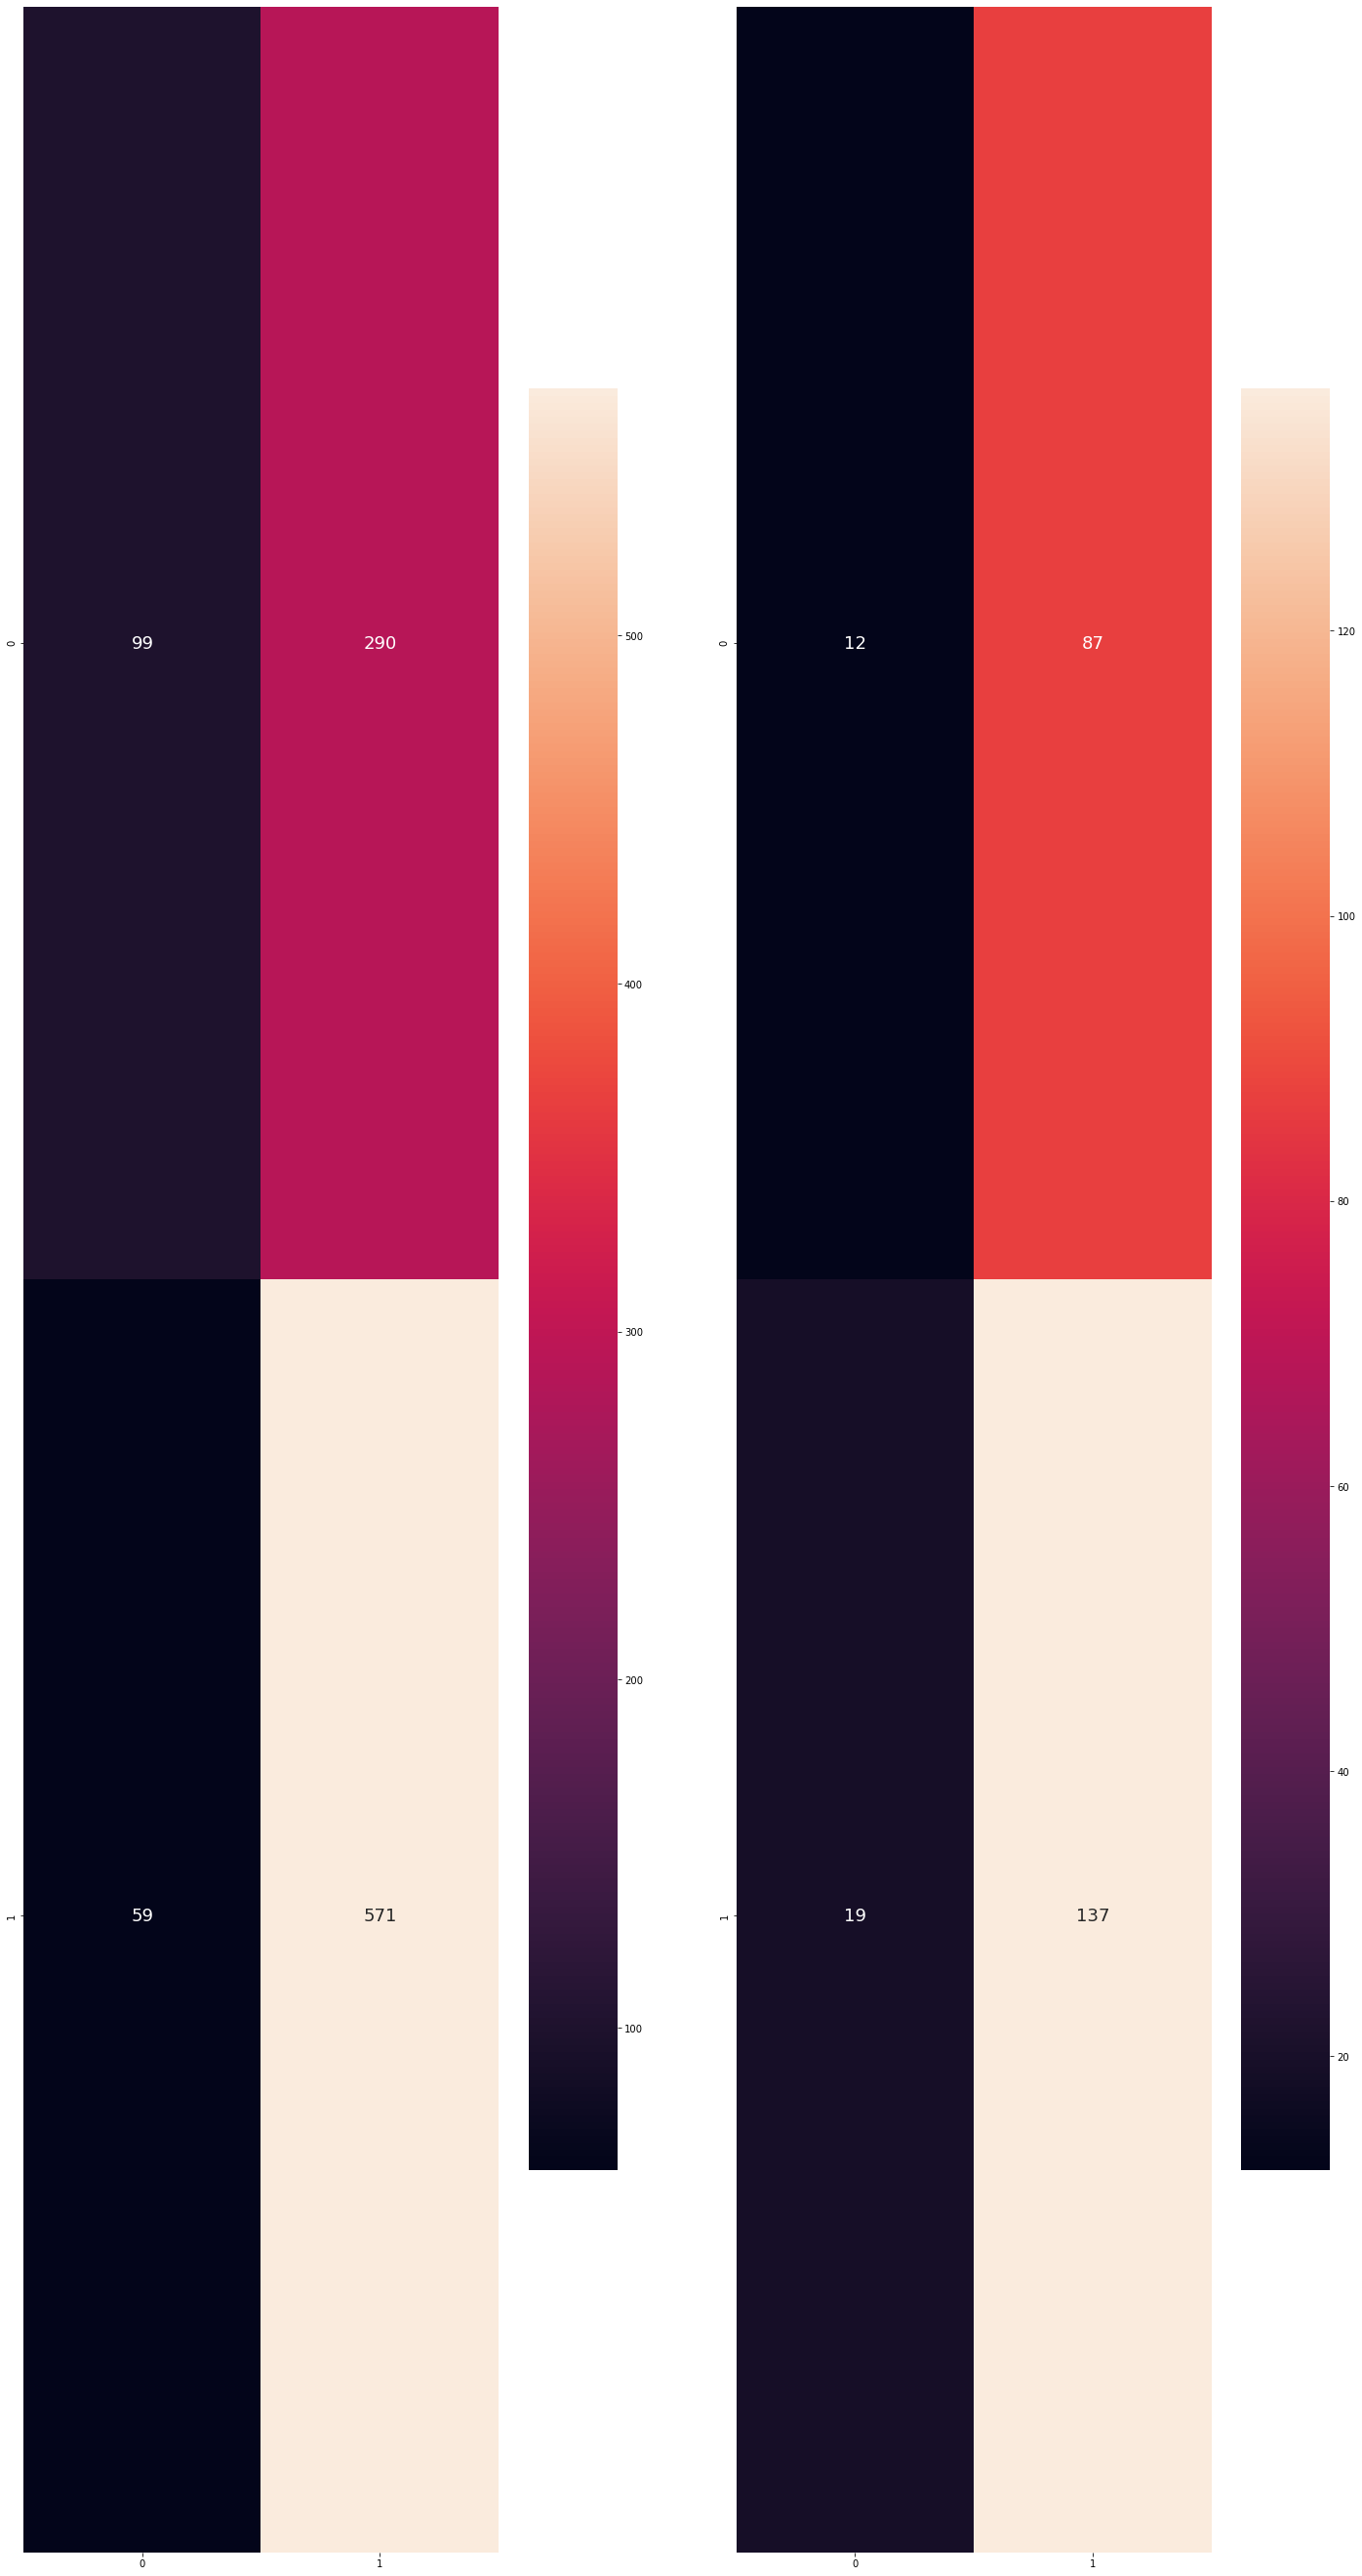

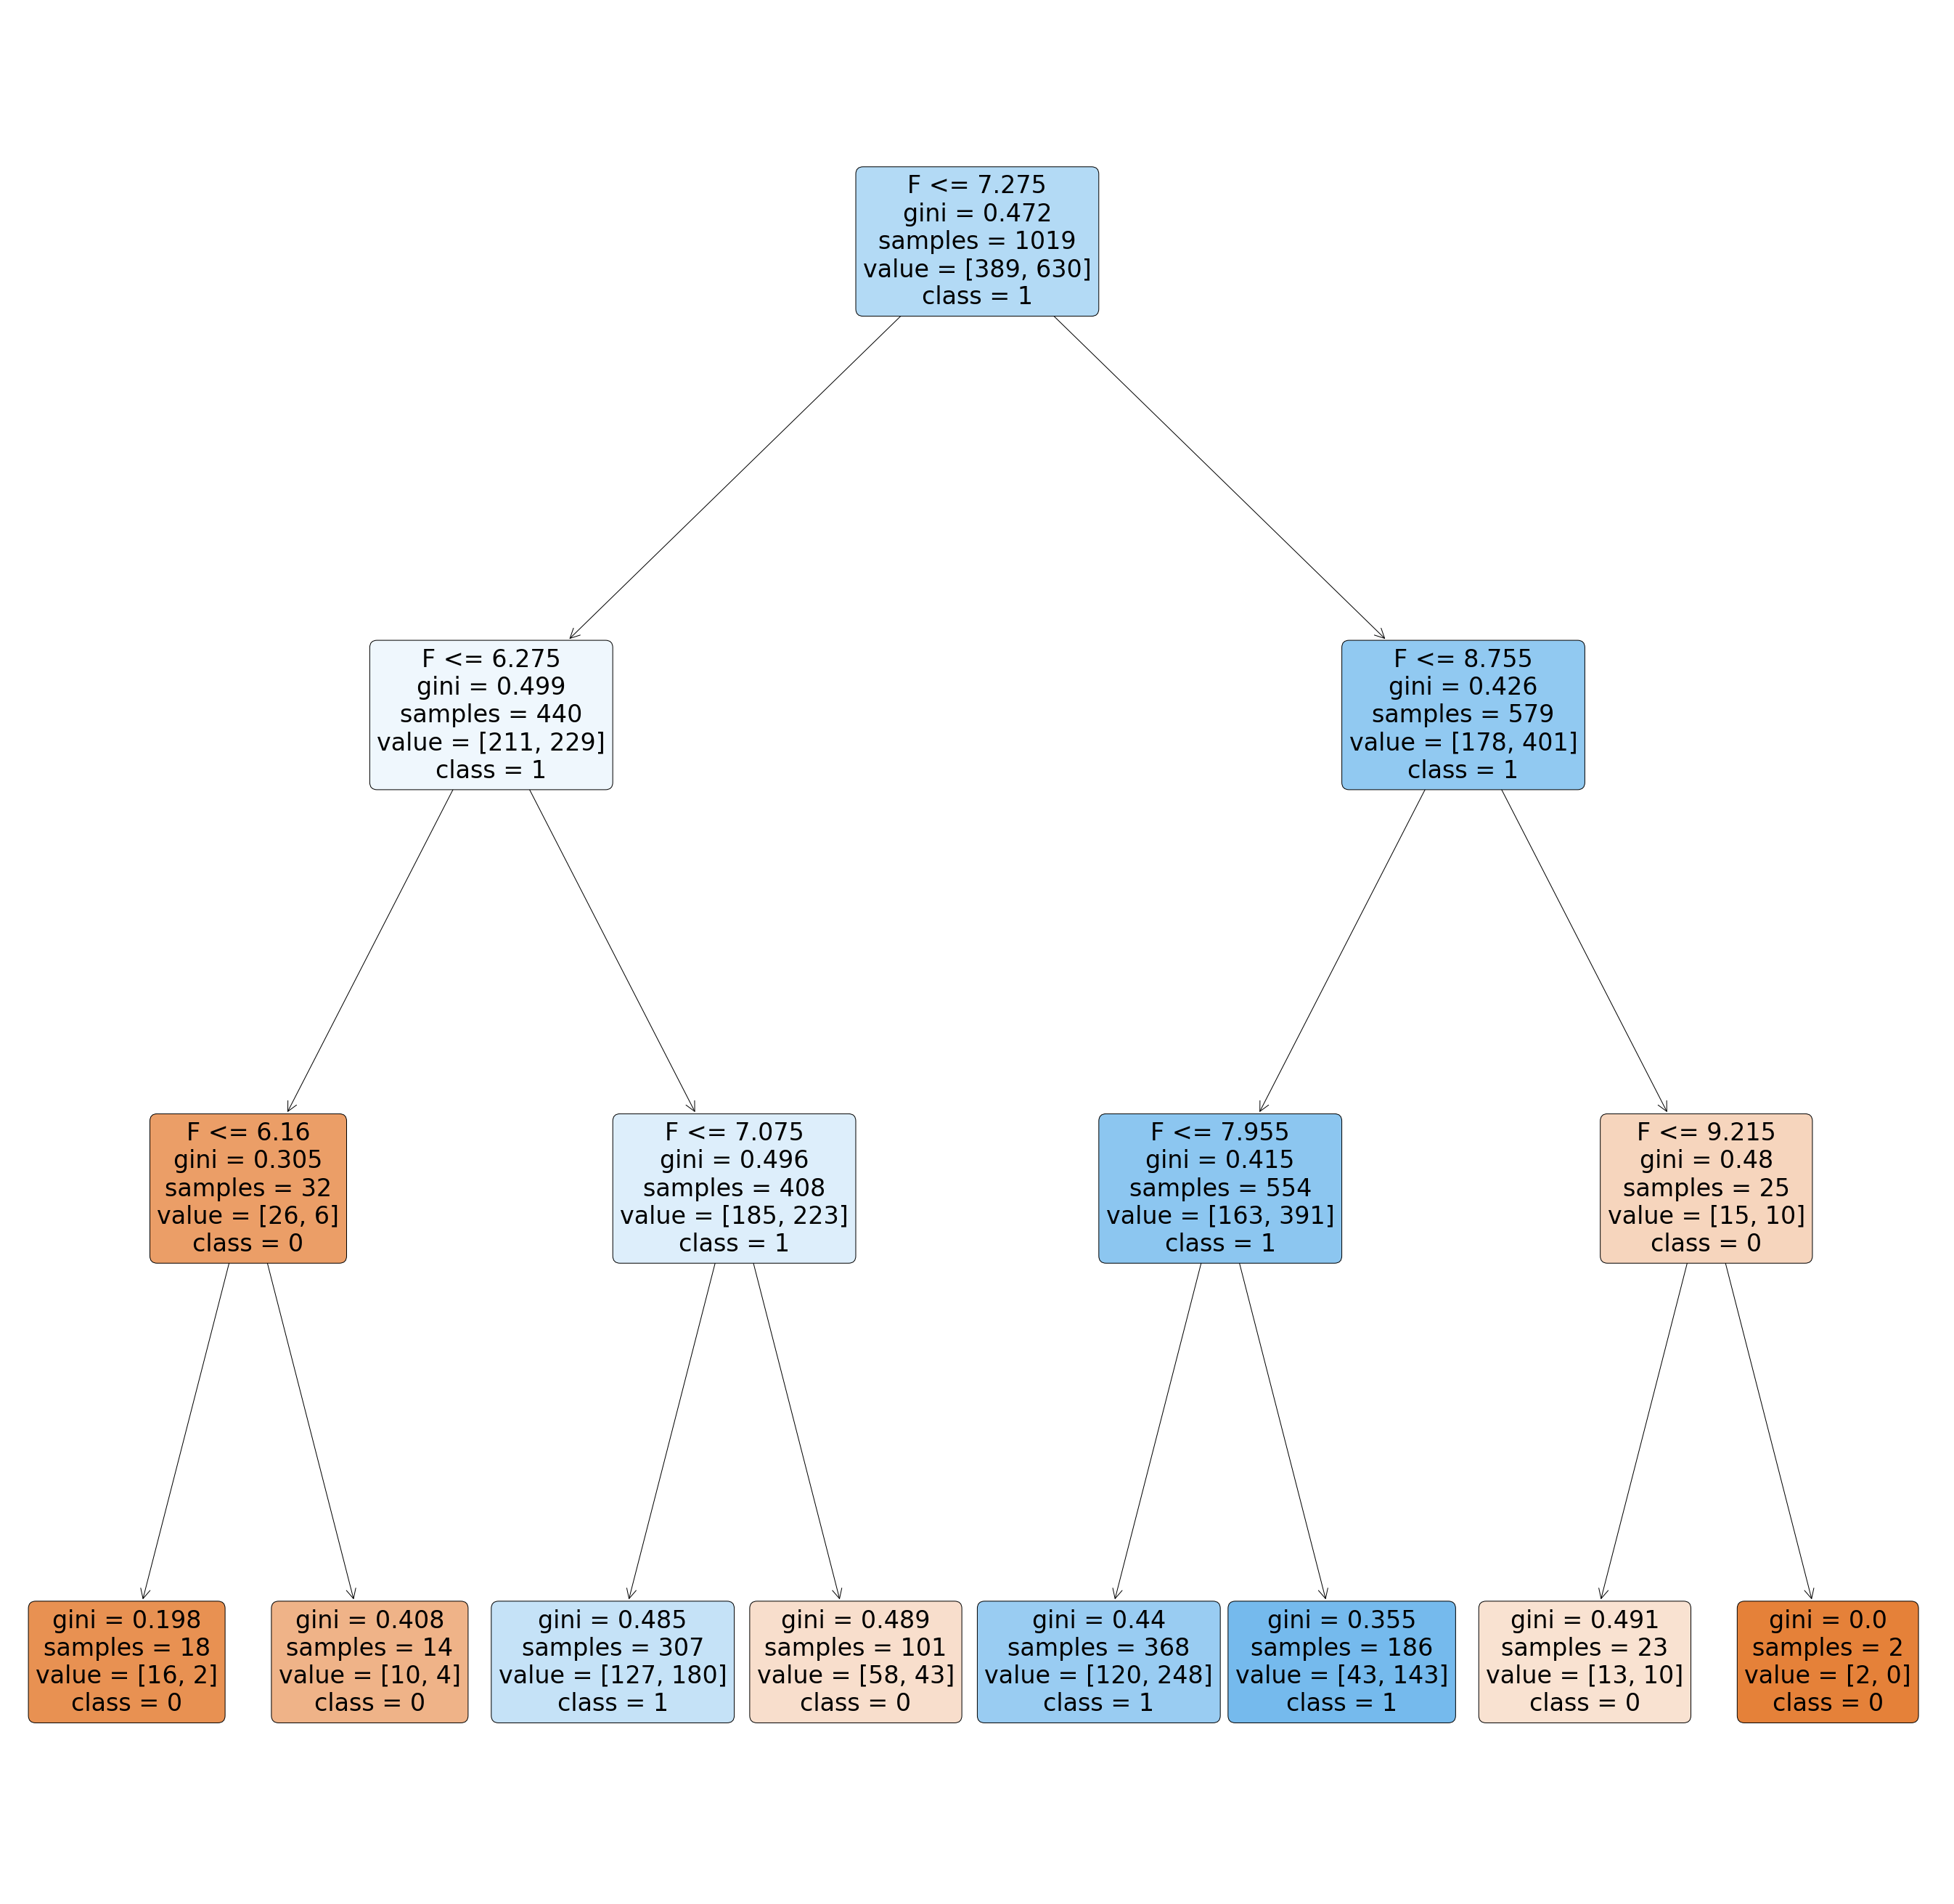

In [173]:
decTree(TV_data_manga["Score_reference3"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),3)

In [367]:
TV_data_manga=TV_data_manga.drop("Score_reference2", axis=1)

In [368]:
TV_data_manga.insert(loc = 1, column = "Score_reference2", value = "bad")

In [369]:
for i in range(len(TV_data_manga)):
    if TV_data_manga["Score"].iloc[i] >7.5:
        TV_data_manga["Score_reference2"].iloc[i] = "good"

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6653581943081452

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.611764705882353



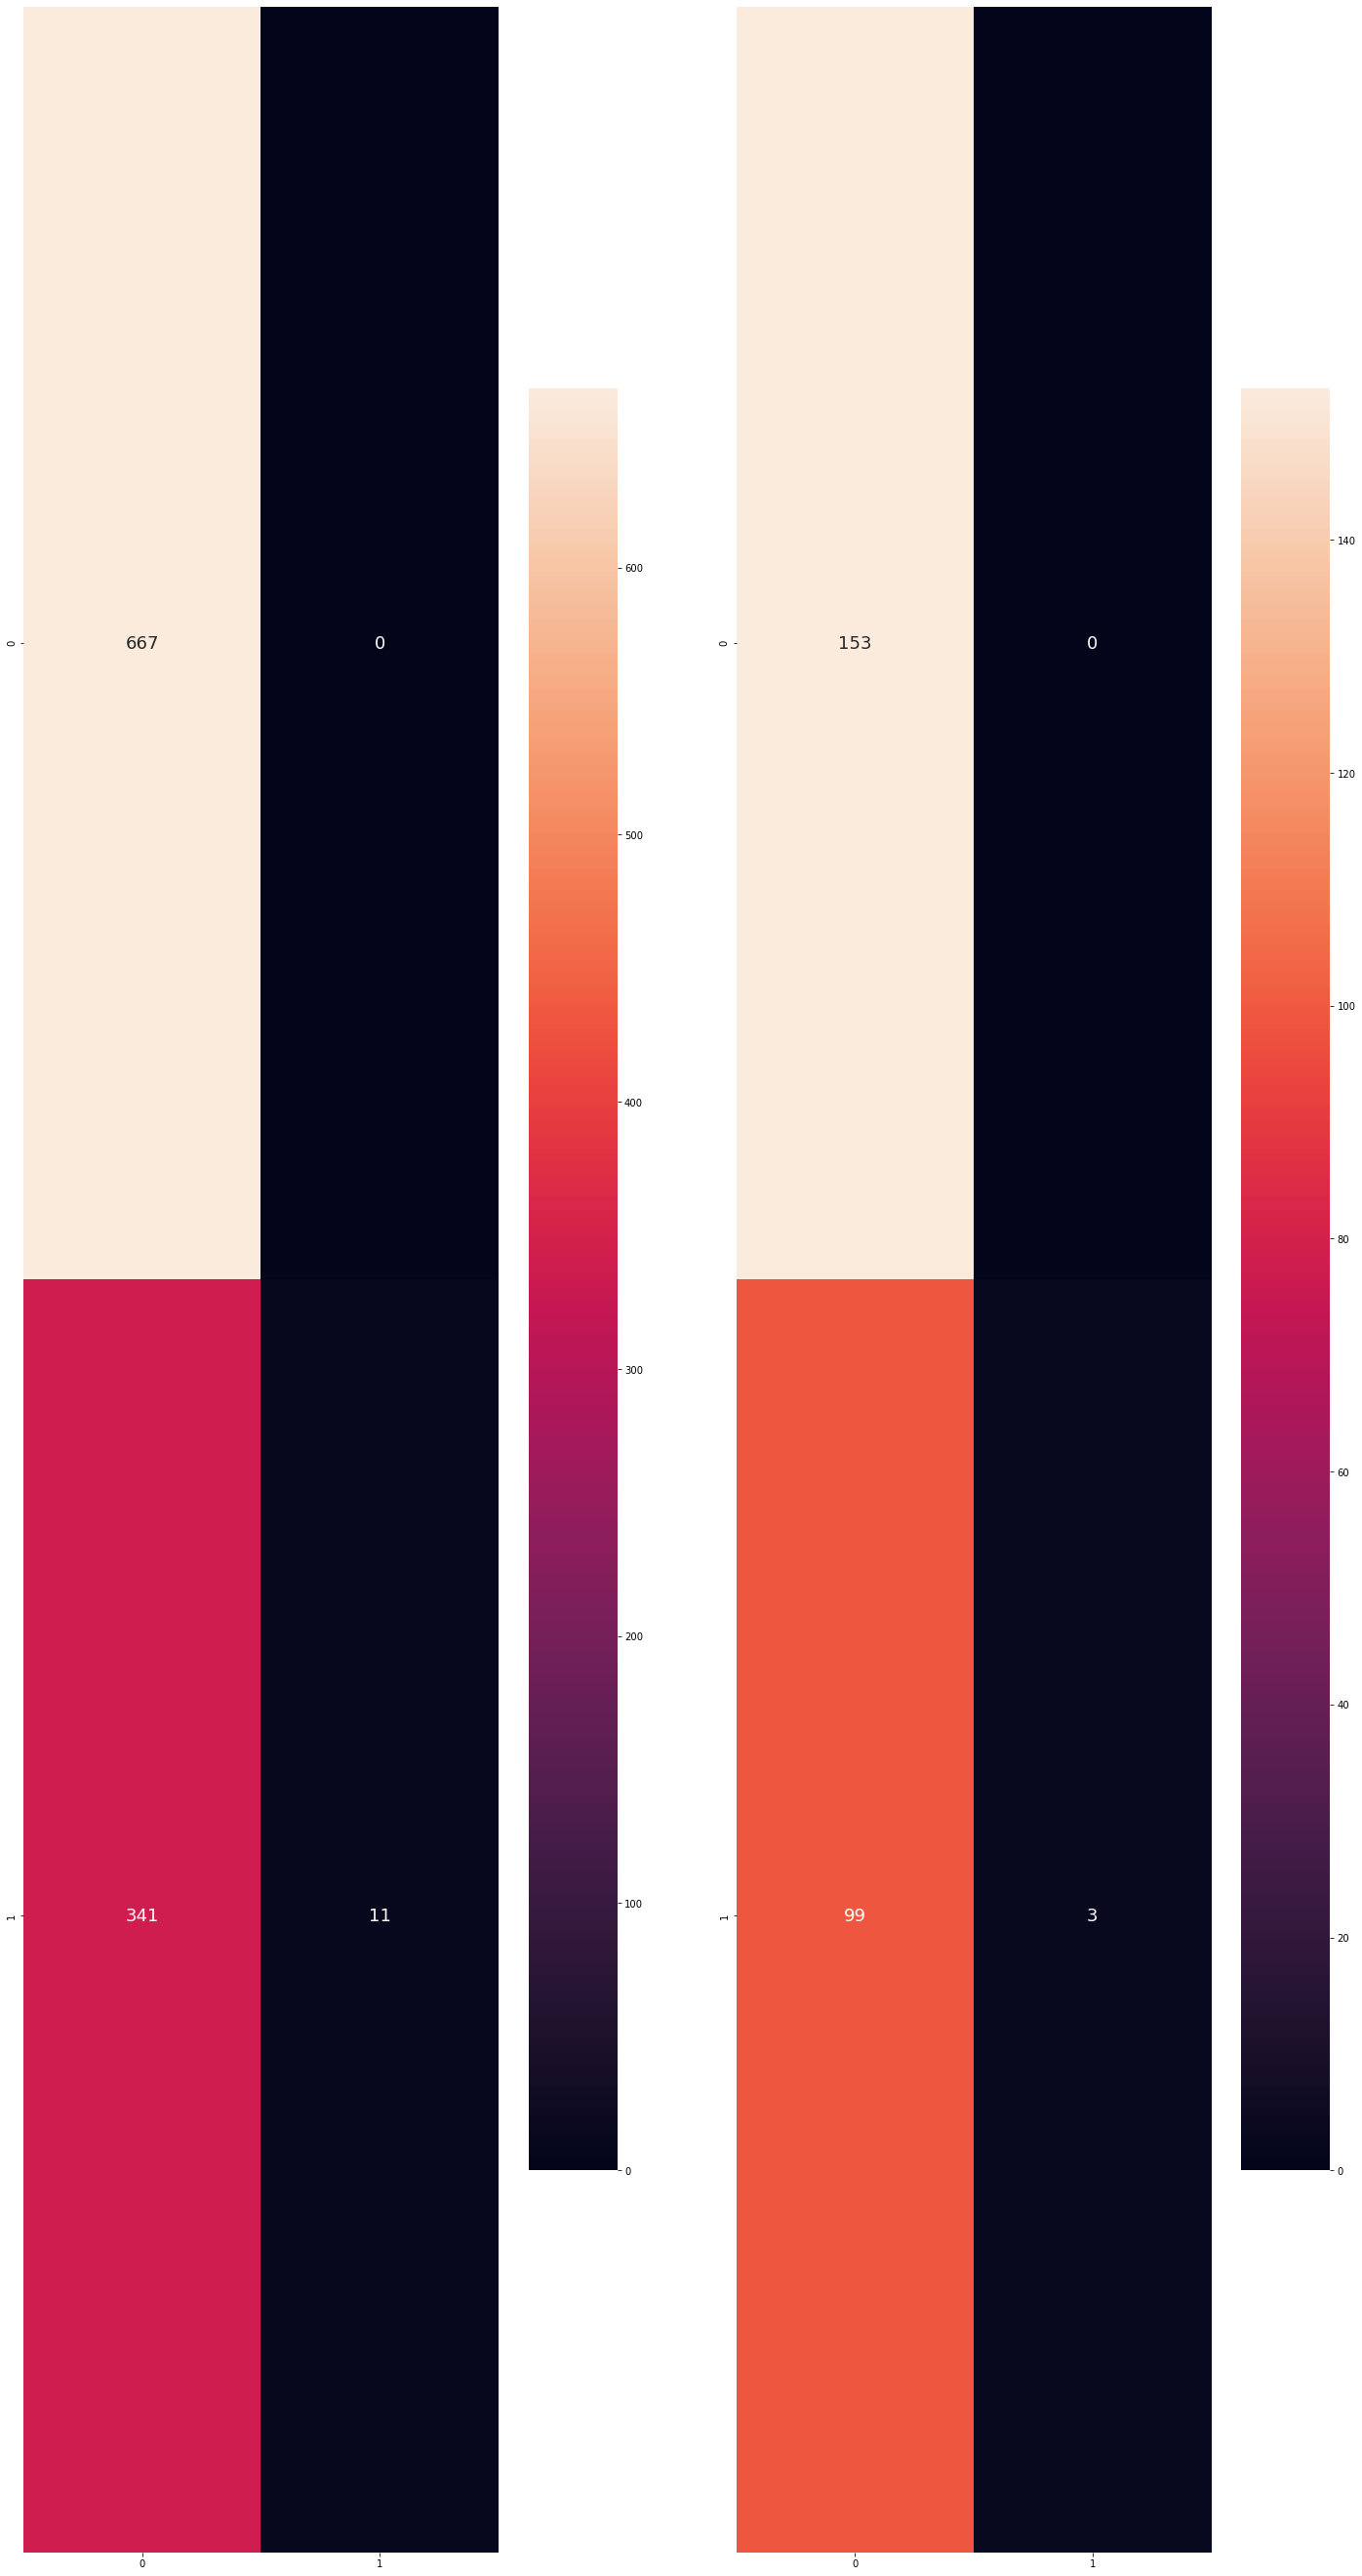

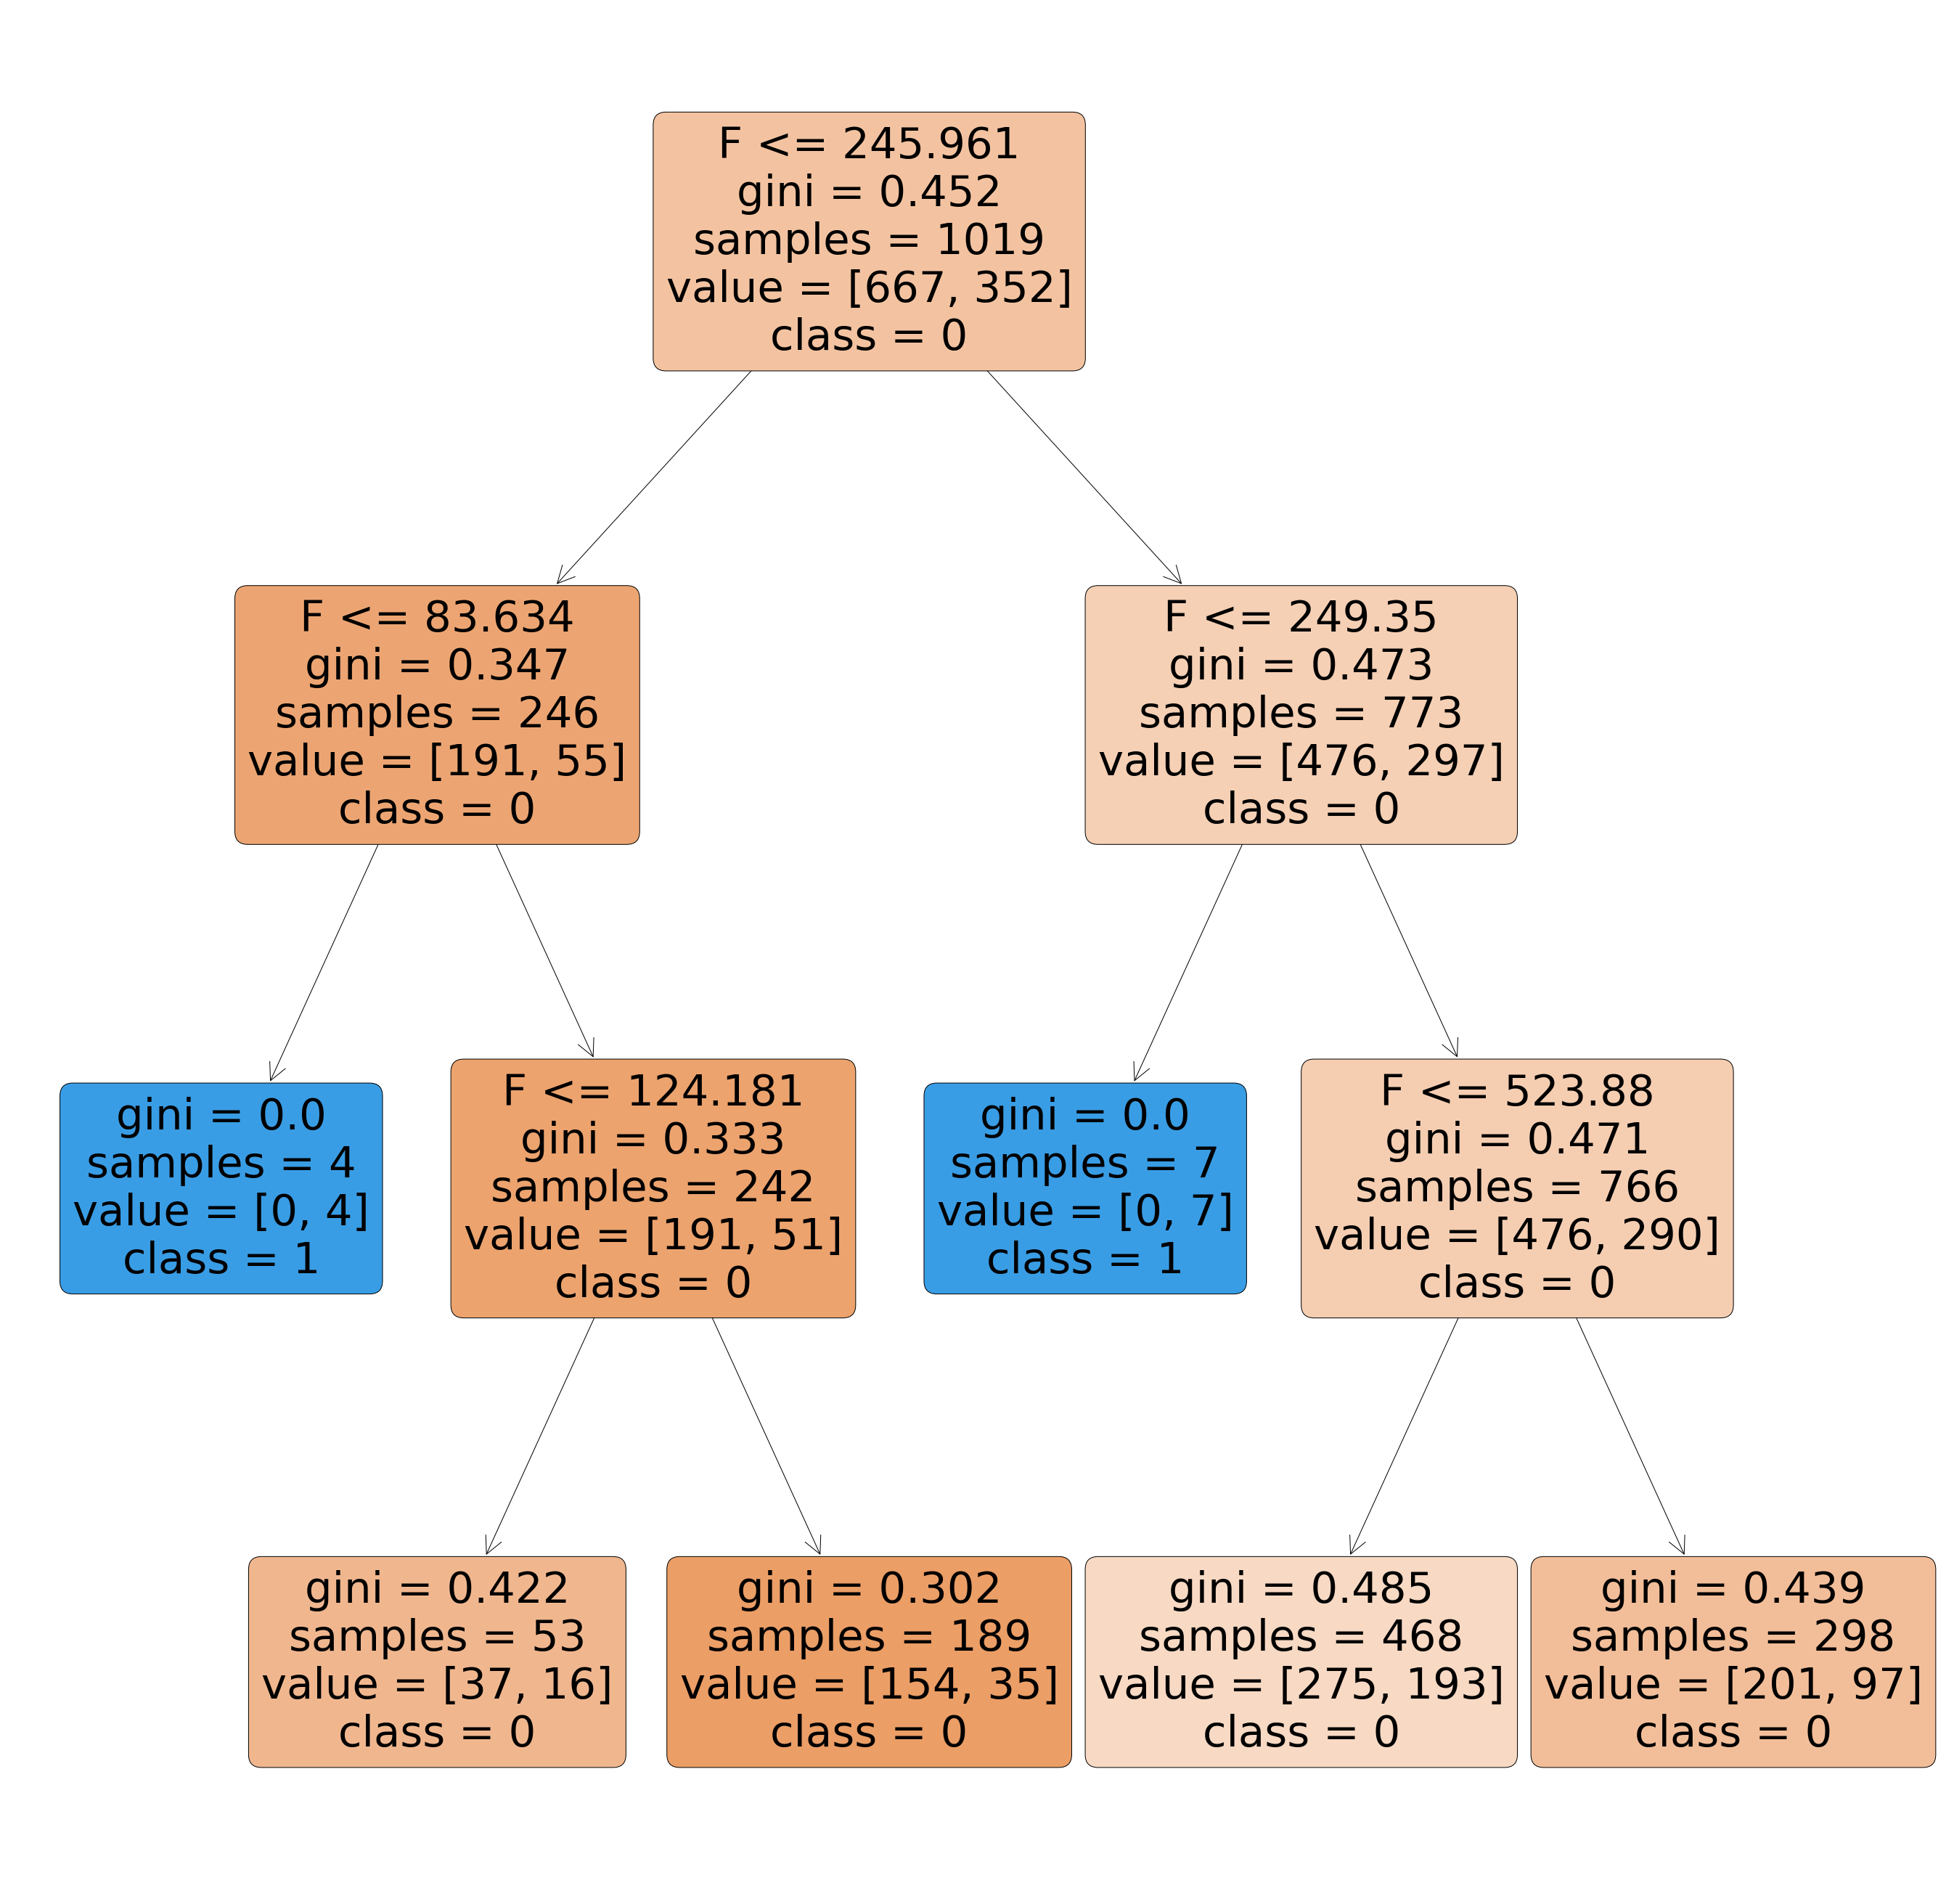

In [370]:
decTree(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["revenue"].to_numpy().reshape(-1,1),3)

,Anime Title,Score_reference,Type,Episodes,Aired,Producers,Studios,Source,Genres,Score,Members,Favorites,Fav%,Source_reference,genre_reference_1,genre_reference_2,Season,Manga_score,revenue
1,Gintama°,High,TV,51,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.11,363879,10353,2.845,0,1,4,2,8.62,326.826013
3,Gintama',High,TV,51,"Apr 4, 2011 to Mar 26, 2012","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,Manga,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",9.08,337198,6013,1.783,0,1,10,2,8.62,326.826013
4,Shingeki no Kyojin Season 3 Part 2,High,TV,10,"Apr 29, 2019 to Jul 1, 2019","Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,"Action, Military, Mystery, Super Power, Drama,...",9.07,815370,28479,3.493,0,1,2,2,6.78,346.440105
5,Gintama': Enchousen,High,TV,13,"Oct 4, 2012 to Mar 28, 2013","TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus",Sunrise,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",9.04,204816,2302,1.124,0,1,4,4,8.62,941.651691
6,3-gatsu no Lion 2nd Season,High,TV,22,"Oct 14, 2017 to Mar 31, 2018","Aniplex, Dentsu, NHK, Hakusensha, Asmik Ace, T...",Shaft,Manga,"Drama, Game, Seinen, Slice of Life",9.02,238010,9854,4.140,0,5,16,4,6.97,482.343860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Makeruna!! Aku no Gundan!,Low,TV,12,"Apr 5, 2017 to Jun 21, 2017",Bushiroad,Tatsunoko Production,Manga,"Comedy, Shounen",5.33,1628,0,0.000,0,4,8,2,6.60,138.556598
1518,Nobunaga-sensei no Osanazuma,Low,TV,12,"Apr 6, 2019 to Jun 22, 2019",NaN,Seven,Manga,"Comedy, Ecchi, Harem, Romance, School",5.29,52359,78,0.149,0,4,35,2,7.71,495.139572
1519,Barom One,Low,TV,13,"Dec 7, 2002 to Mar 22, 2003",AT-X,E&G Films,Manga,"Action, Sci-Fi, Supernatural, Shounen",5.25,1576,1,0.063,0,1,10,4,8.30,331.380807
1520,Omae wa Mada Gunma wo Shiranai,Low,TV,12,"Apr 2, 2018 to Jun 18, 2018",TOHO animation,Asahi Production,Web manga,"Comedy, School",5.25,11760,2,0.017,0,4,24,2,7.05,115.229535
